# Libraries

In [1]:
#dataframe
import pandas as pd

# time filter
import datetime

# basic math and stats formulas and plots
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     
#nan visualization
import missingno as mno



# Import dataset

In [2]:
df = pd.read_csv('Dataset/DatiSynop_16061.csv', sep = ';')
df.head()

date  idstazione   lon    lat  altezza  pressure  \
0  1996-01-01 00:00       16061  7.72  45.03      710   91220.0   
1  1996-01-01 03:00       16061  7.72  45.03      710       NaN   
2  1996-01-01 06:00       16061  7.72  45.03      710   91270.0   
3  1996-01-01 09:00       16061  7.72  45.03      710   91400.0   
4  1996-01-01 12:00       16061  7.72  45.03      710   91570.0   

   three_hour_pressure_change  char_pressure_tendency  wind_direction  \
0                         NaN                     NaN             0.0   
1                         NaN                     NaN             NaN   
2                        50.0                     1.0             0.0   
3                       130.0                     3.0           280.0   
4                       180.0                     1.0             0.0   

   wind_speed  relative_humidity  visibility  present_weather  past_weather1  \
0      1.9438                NaN     20000.0              2.0            1.0   
1         NaN                NaN     20000.0              2.0            1.0   
2      1.9438                NaN     20000.0              2.0            1.0   
3      5.8314                NaN     75000.0              2.0            1.0   
4      1.9438                NaN     75000.0              2.0            1.0   

   past_weather2  cloud_cover  height_of_base_of_cloud  cloud_type  drybulb  \
0            1.0          0.0                      NaN          33      NaN   
1            1.0          NaN                      NaN          62      NaN   
2            1.0          0.0                      NaN          62      NaN   
3            1.0          0.0                      NaN          62      NaN   
4            1.0          2.0                   3500.0          30      NaN   

   dewpoint  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

- *relative_humidity* has to be dropped because has all NaN values,   
- *lon*, *lat*, *altezza*, *idstazione* are columns that have the same value for every row because the dataset is about one airport  
- *height_of_base_of_cloud* has a lot of NaN values and they are randomicallyy positioned.

In [3]:
df['date']= pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
print(f"Dataset shape: {df.shape}\n{df.isna().sum()}")
df = df.drop(['relative_humidity', 'lon', 'lat', 'altezza', 'idstazione','height_of_base_of_cloud'], axis = 1)

Dataset shape: (161016, 20)
date                               0
idstazione                         0
lon                                0
lat                                0
altezza                            0
pressure                          66
three_hour_pressure_change       192
char_pressure_tendency          2935
wind_direction                    10
wind_speed                        10
relative_humidity             161016
visibility                        14
present_weather                  104
past_weather1                    115
past_weather2                    118
cloud_cover                    19584
height_of_base_of_cloud        76612
cloud_type                         0
drybulb                        97487
dewpoint                       97486
dtype: int64


# Date Features

In [4]:
def get_year(dt):
    '''Takes a time timestamp as input and returns the year'''
    return dt.year

def get_month(dt):
    '''Takes a time timestamp as input and returns the month'''
    return dt.month

def get_day(dt):
    '''Takes a time timestamp as input and returns the day'''
    return dt.day

def get_hour(dt):
    '''Takes a time timestamp as input and returns the hour'''
    return dt.hour

def get_julian(dt):
    return dt.to_julian_date()

def hourfromtd(td):
    sec = td.total_seconds()
    hours = sec/3600
    return hours


# Adding the new variables to the dataframe

df['Year'] = df['date'].apply(get_year)
df['Month'] = df['date'].apply(get_month)
df['Day'] = df['date'].apply(get_day)
df['Hour'] = df['date'].apply(get_hour)

df['Julian'] = df['date'].apply(get_julian)

df['date_diff'] = df['date'].diff()
df['date_diff'] = df['date_diff'].apply(hourfromtd)
df['date_diff'] = df['date_diff'].fillna(0.0)
df['date_diff'] = df['date_diff'].astype(int)

In [5]:
df.describe().applymap('{:,.2f}'.format)

pressure three_hour_pressure_change char_pressure_tendency  \
count  160,950.00                 160,824.00             158,081.00   
mean    93,309.10                       1.60                   4.24   
std        723.84                      97.60                   2.53   
min     66,870.00                  -1,160.00                   0.00   
25%     92,920.00                     -60.00                   2.00   
50%     93,390.00                       0.00                   4.00   
75%     93,780.00                      60.00                   6.00   
max    101,520.00                   1,000.00                   8.00   

      wind_direction  wind_speed  visibility present_weather past_weather1  \
count     161,006.00  161,006.00  161,002.00      160,912.00    160,901.00   
mean          112.39        3.53   23,384.66           10.73          1.84   
std           128.81        3.90   17,092.08           19.09          1.90   
min             0.00        0.00       50.00            1.00          0.00   
25%             0.00        0.00   10,000.00            2.00          1.00   
50%            40.00        3.89   20,000.00            2.00          1.00   
75%           200.00        5.83   40,000.00           10.00          1.00   
max           360.00       99.13   75,000.00           99.00          9.00   

      past_weather2 cloud_cover  cloud_type    drybulb   dewpoint        Year  \
count    160,898.00  141,432.00  161,016.00  63,529.00  63,530.00  161,016.00   
mean           1.49        2.99       46.31      11.89       6.28    2,010.82   
std            1.21        2.96       14.90       7.27       9.14        6.32   
min            0.00        0.00       30.00      -8.95     -29.95    1,996.00   
25%            1.00        0.00       32.00       6.05       0.55    2,007.00   
50%            1.00        2.00       38.00      11.65       7.15    2,011.00   
75%            1.00        6.00       62.00      17.45      13.35    2,016.00   
max            9.00        8.00       62.00      34.85      27.95    2,022.00   

            Month         Day        Hour        Julian   date_diff  
count  161,016.00  161,016.00  161,016.00    161,016.00  161,016.00  
mean         6.43       15.70       11.36  2,455,676.98        1.42  
std          3.44        8.77        6.92      2,307.46        9.72  
min          1.00        1.00        0.00  2,450,083.50        0.00  
25%          3.00        8.00        6.00  2,454,107.49        1.00  
50%          6.00       16.00       12.00  2,455,826.19        1.00  
75%          9.00       23.00       18.00  2,457,513.93        1.00  
max         12.00       31.00       23.00  2,459,591.46    2,931.00

# Time series visualization
In specific we can see from the visualization that this is not a homogenous time series

In [6]:
first_date = df['date'].min()
last_date = df['date'].max()
begins_1h =  pd.to_datetime("2005-03-15 18:00:00", format='%Y-%m-%d %H:%M:%S')

time_series_3h = pd.Series(pd.date_range(start = first_date, end = begins_1h, freq='3H'), name = 'real1')
time_series_1h = pd.Series(pd.date_range(start = begins_1h, end = last_date, freq='1H'), name = 'real2')

df1 = df.copy()
df1['plot'] = 10

complete_range = time_series_3h.append(time_series_1h)
merged_df = df1.set_index('date').reindex(complete_range)


C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\1580459443.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  complete_range = time_series_3h.append(time_series_1h)


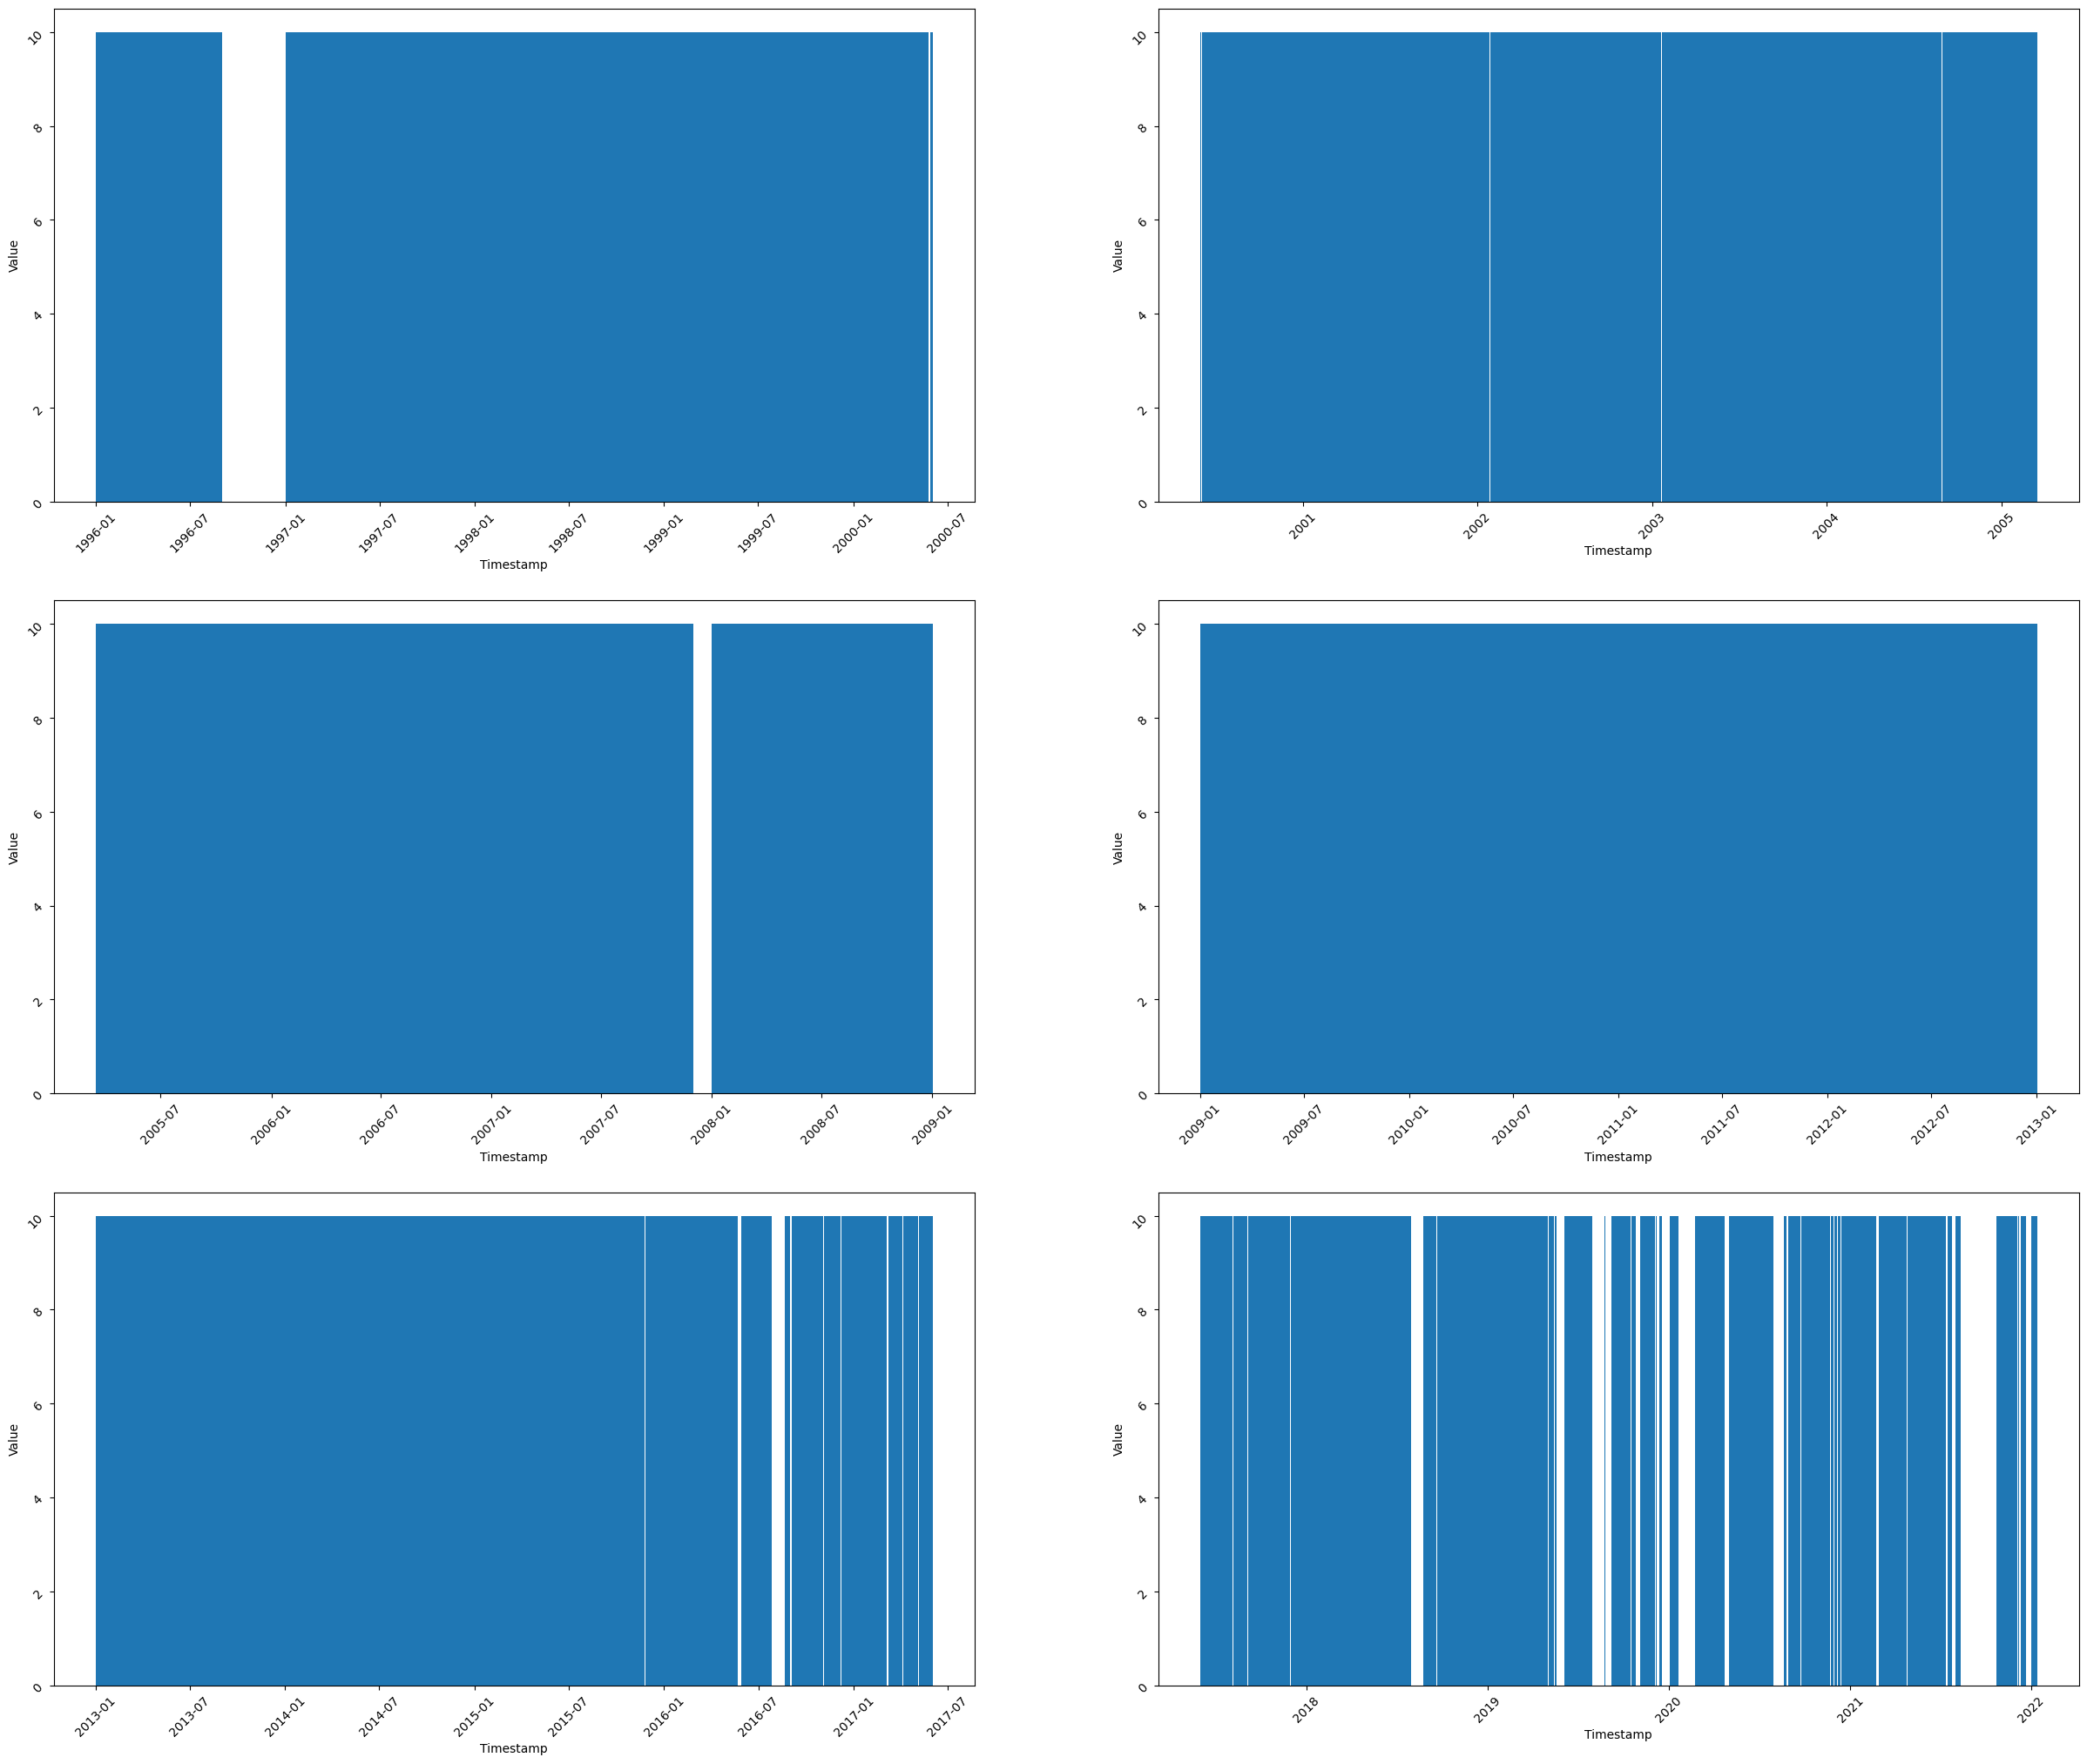

In [7]:
tmp1 =  merged_df[(merged_df.index >= first_date) & (merged_df.index <= pd.to_datetime("2000-06-01 00:00:00", format='%Y-%m-%d %H:%M:%S'))].copy()
tmp2 =  merged_df[(merged_df.index >= pd.to_datetime("2000-06-01 00:00:00", format='%Y-%m-%d %H:%M:%S')) & (merged_df.index <= begins_1h)].copy()
tmp3 =  merged_df[(merged_df.index >= begins_1h) & (merged_df.index <= pd.to_datetime("2009-01-01 00:00:00", format='%Y-%m-%d %H:%M:%S'))].copy()
tmp4 =  merged_df[(merged_df.index >= pd.to_datetime("2009-01-01 00:00:00", format='%Y-%m-%d %H:%M:%S')) & (merged_df.index <= pd.to_datetime("2013-01-01 00:00:00", format='%Y-%m-%d %H:%M:%S'))].copy()
tmp5 =  merged_df[(merged_df.index >= pd.to_datetime("2013-01-01 00:00:00", format='%Y-%m-%d %H:%M:%S')) & (merged_df.index <= pd.to_datetime("2017-06-01 00:00:00", format='%Y-%m-%d %H:%M:%S'))].copy()
tmp6 =  merged_df[(merged_df.index >= pd.to_datetime("2017-06-01 00:00:00", format='%Y-%m-%d %H:%M:%S')) & (merged_df.index <= last_date)].copy()

fig, axes = plt.subplots(3, 2, figsize = (30, 25))
axes[0,0].bar(tmp1.index, tmp1['plot'])
axes[0,0].set_xlabel('Timestamp')
axes[0,0].set_ylabel('Value')
axes[0,0].tick_params(labelrotation=45)


axes[0,1].bar(tmp2.index, tmp2['plot'])
axes[0,1].set_xlabel('Timestamp')
axes[0,1].set_ylabel('Value')
axes[0,1].tick_params(labelrotation=45)

axes[1,0].bar(tmp3.index, tmp3['plot'])
axes[1,0].set_xlabel('Timestamp')
axes[1,0].set_ylabel('Value')
axes[1,0].tick_params(labelrotation=45)

axes[1,1].bar(tmp4.index, tmp4['plot'])
axes[1,1].set_xlabel('Timestamp')
axes[1,1].set_ylabel('Value')
axes[1,1].tick_params(labelrotation=45)

axes[2,0].bar(tmp5.index, tmp5['plot'])
axes[2,0].set_xlabel('Timestamp')
axes[2,0].set_ylabel('Value')
axes[2,0].tick_params(labelrotation=45)

axes[2,1].bar(tmp6.index, tmp6['plot'])
axes[2,1].set_xlabel('Timestamp')
axes[2,1].set_ylabel('Value')
axes[2,1].tick_params(labelrotation=45)


plt.show()

In [8]:
df.tail()

date  pressure  three_hour_pressure_change  \
161011 2022-01-11 19:00:00   93910.0                       120.0   
161012 2022-01-11 20:00:00   93970.0                       160.0   
161013 2022-01-11 21:00:00   94000.0                       140.0   
161014 2022-01-11 22:00:00   94010.0                       100.0   
161015 2022-01-11 23:00:00   94060.0                        90.0   

        char_pressure_tendency  wind_direction  wind_speed  visibility  \
161011                     2.0             0.0      0.0000     50000.0   
161012                     2.0             0.0      0.0000     50000.0   
161013                     2.0             0.0      0.0000     50000.0   
161014                     1.0             0.0      0.0000     50000.0   
161015                     1.0            70.0      3.8876     50000.0   

        present_weather  past_weather1  past_weather2  cloud_cover  \
161011              2.0            1.0            1.0          0.0   
161012              2.0            1.0            1.0          0.0   
161013              2.0            1.0            1.0          0.0   
161014              2.0            1.0            1.0          0.0   
161015              2.0            1.0            1.0          0.0   

        cloud_type  drybulb  dewpoint  Year  Month  Day  Hour        Julian  \
161011          62     4.85    -11.25  2022      1   11    19  2.459591e+06   
161012          62     4.85    -13.55  2022      1   11    20  2.459591e+06   
161013          62     3.85    -14.35  2022      1   11    21  2.459591e+06   
161014          62     3.25    -10.35  2022      1   11    22  2.459591e+06   
161015          62     3.05     -9.85  2022      1   11    23  2.459591e+06   

        date_diff  
161011          1  
161012          1  
161013          1  
161014          1  
161015          1

# Date selection

The dataset has a first part of data taken with a frequency of 3 hours and a second part taken with an hourly frequency. So we cut the dataset from the point in which there's this change in the data collection. We stop the extraction of data at 2019 because after that the time series is quite messy (maybe COVID-19 messed things up)

In [8]:
df = df[df['date'] >= pd.to_datetime("2013-09-01 00:00:00", format='%Y-%m-%d %H:%M:%S')]
df = df[df['date'] < pd.to_datetime("2019-01-01 00:00:00", format='%Y-%m-%d %H:%M:%S')]

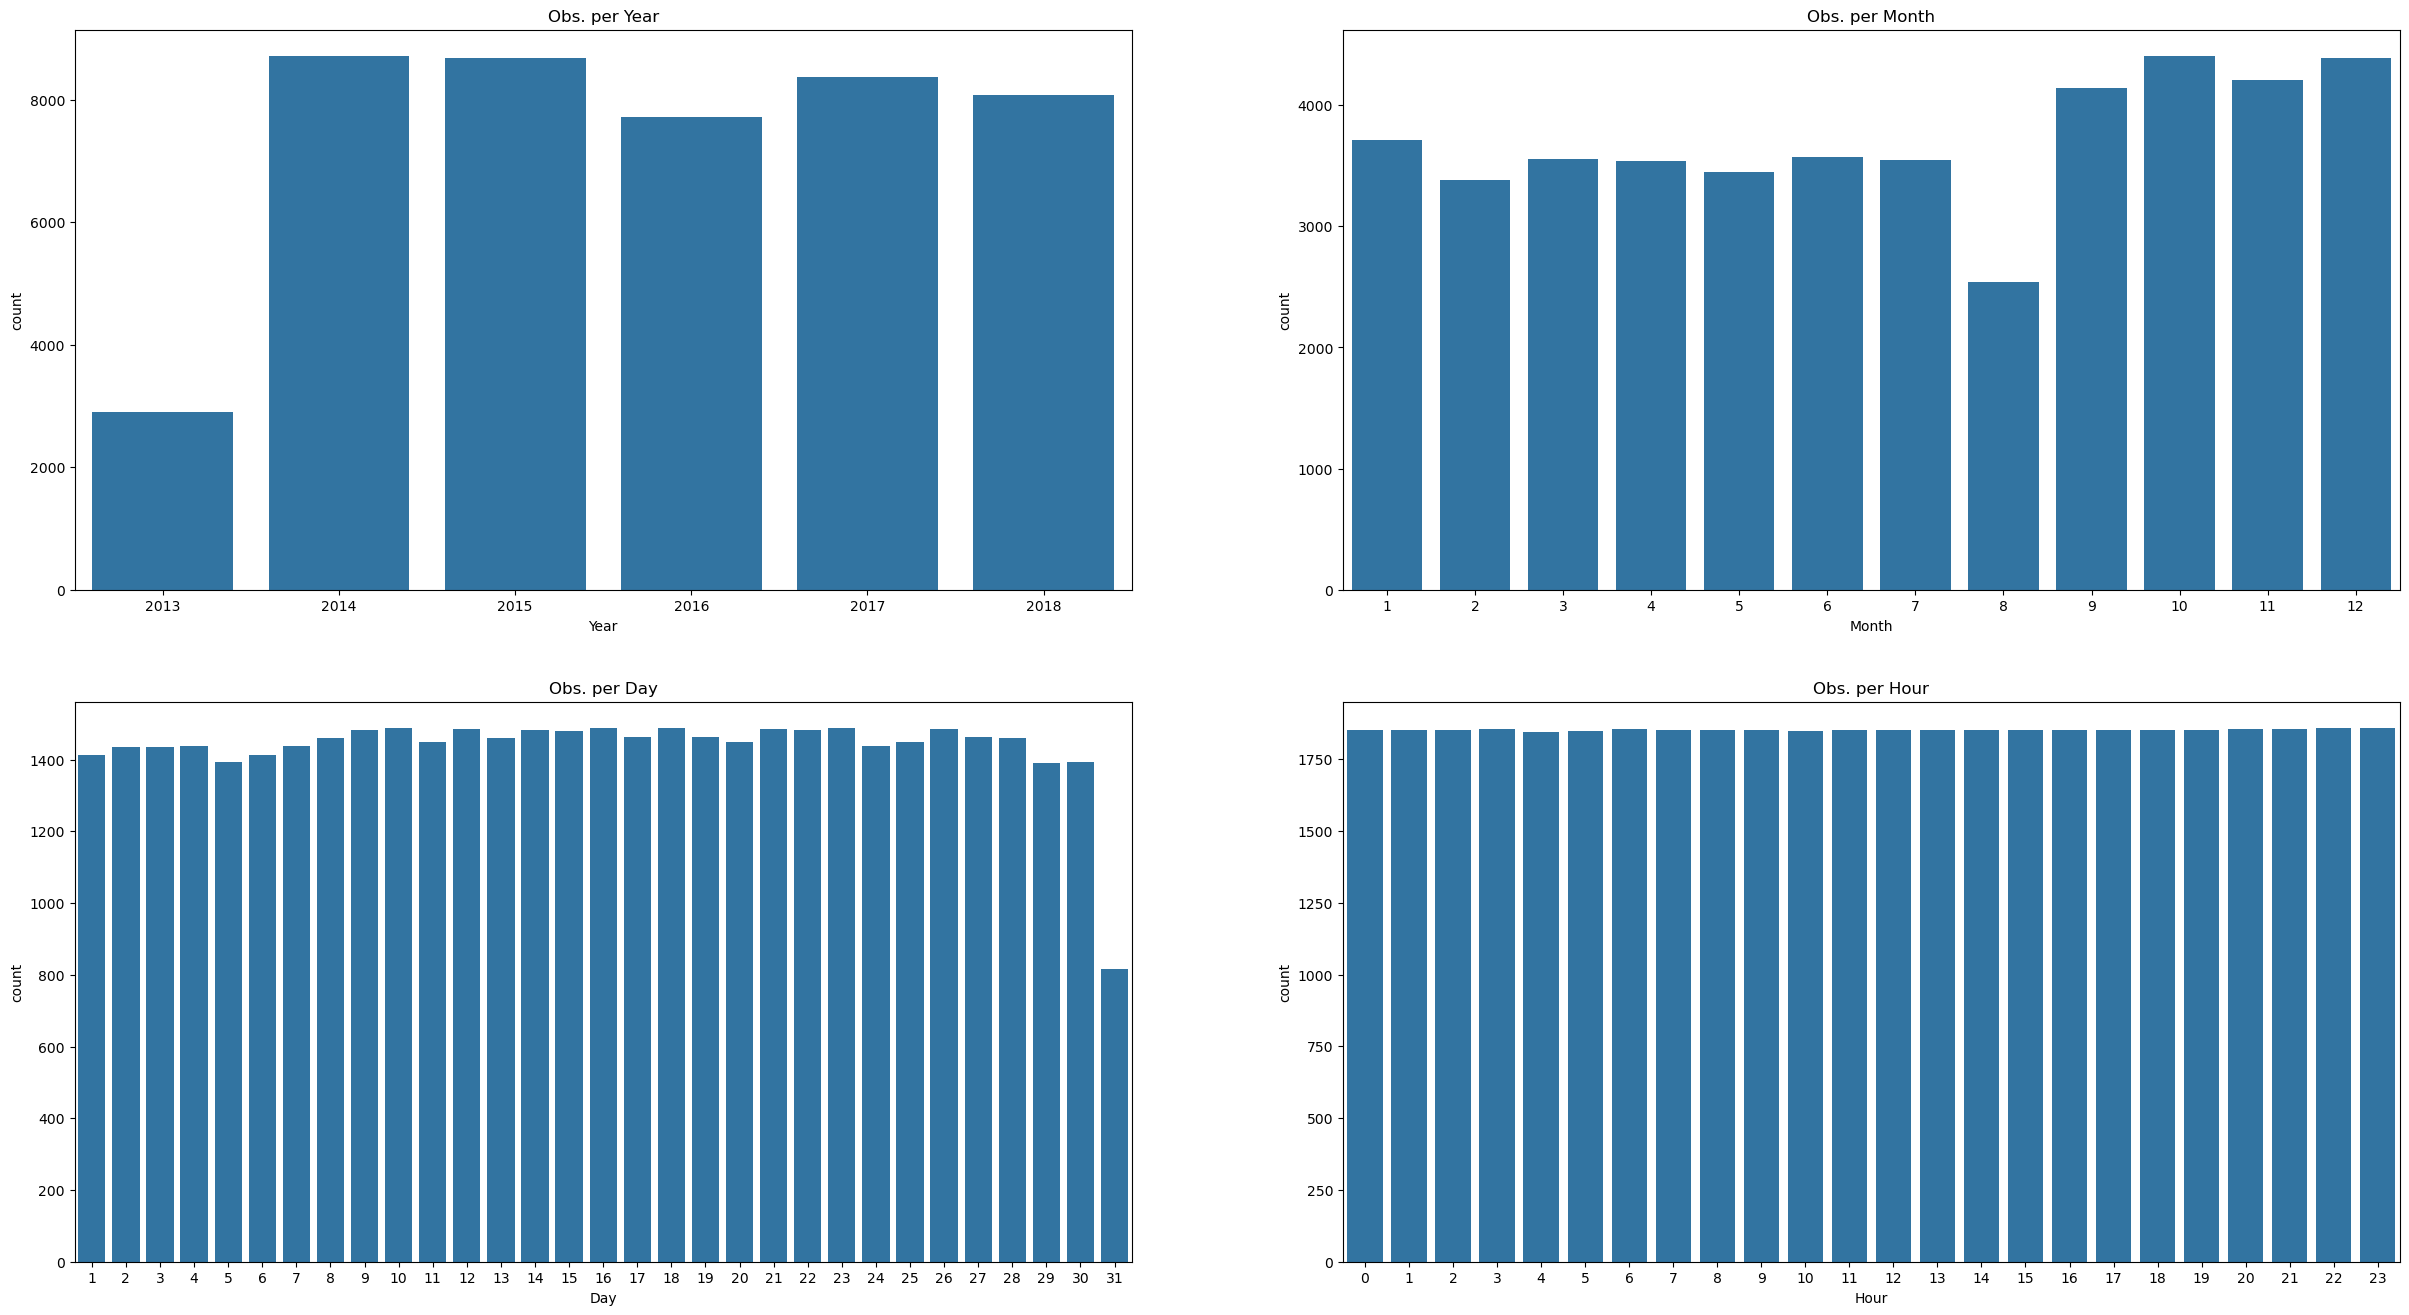

In [10]:
fig, axes = plt.subplots(2,2,figsize = (30,16))
sns.countplot(data = df, x = 'Year', ax = axes[0,0])
axes[0,0].set_title('Obs. per Year')
sns.countplot(data = df, x = 'Month', ax = axes[0,1])
axes[0,1].set_title('Obs. per Month')
sns.countplot(data = df, x = 'Day', ax = axes[1,0])
axes[1,0].set_title('Obs. per Day')
sns.countplot(data = df, x = 'Hour', ax = axes[1,1])
axes[1,1].set_title('Obs. per Hour')
plt.show()

date  pressure  three_hour_pressure_change  char_pressure_tendency  \
NaN     0         2                          32                      32   

     wind_direction  wind_speed  visibility  present_weather  past_weather1  \
NaN               0           0           0                2              3   

     past_weather2  cloud_cover  cloud_type  drybulb  dewpoint  Year  Month  \
NaN              3         5705           0        2         1     0      0   

     Day  Hour  Julian  date_diff  
NaN    0     0       0          0

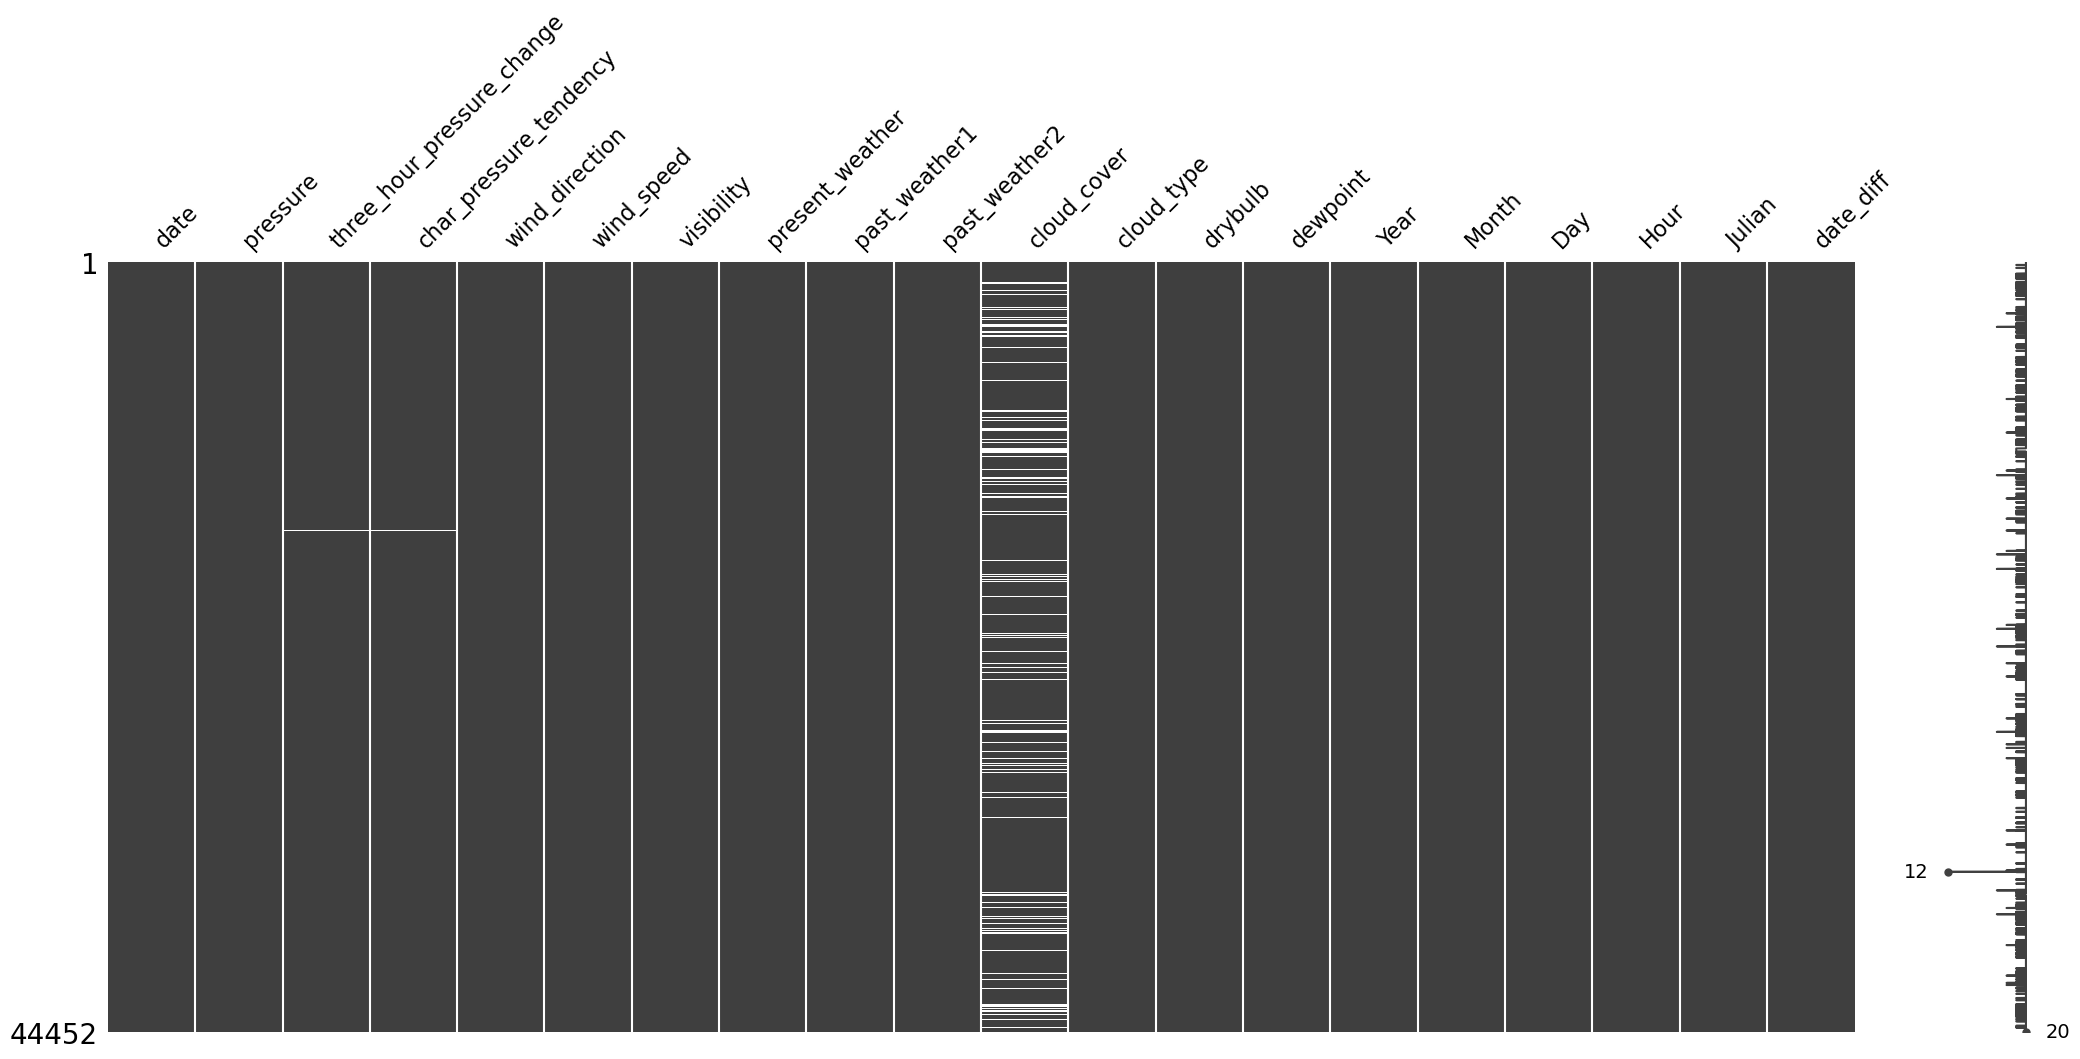

In [11]:
mno.matrix(df)
pd.DataFrame(df.isna().sum(), columns = ['NaN']).T

# EDA

## Visibility

In [12]:
print(f"{df['visibility'].isna().sum()} Nan out of {df.shape[0]} data")

0 Nan out of 44452 data


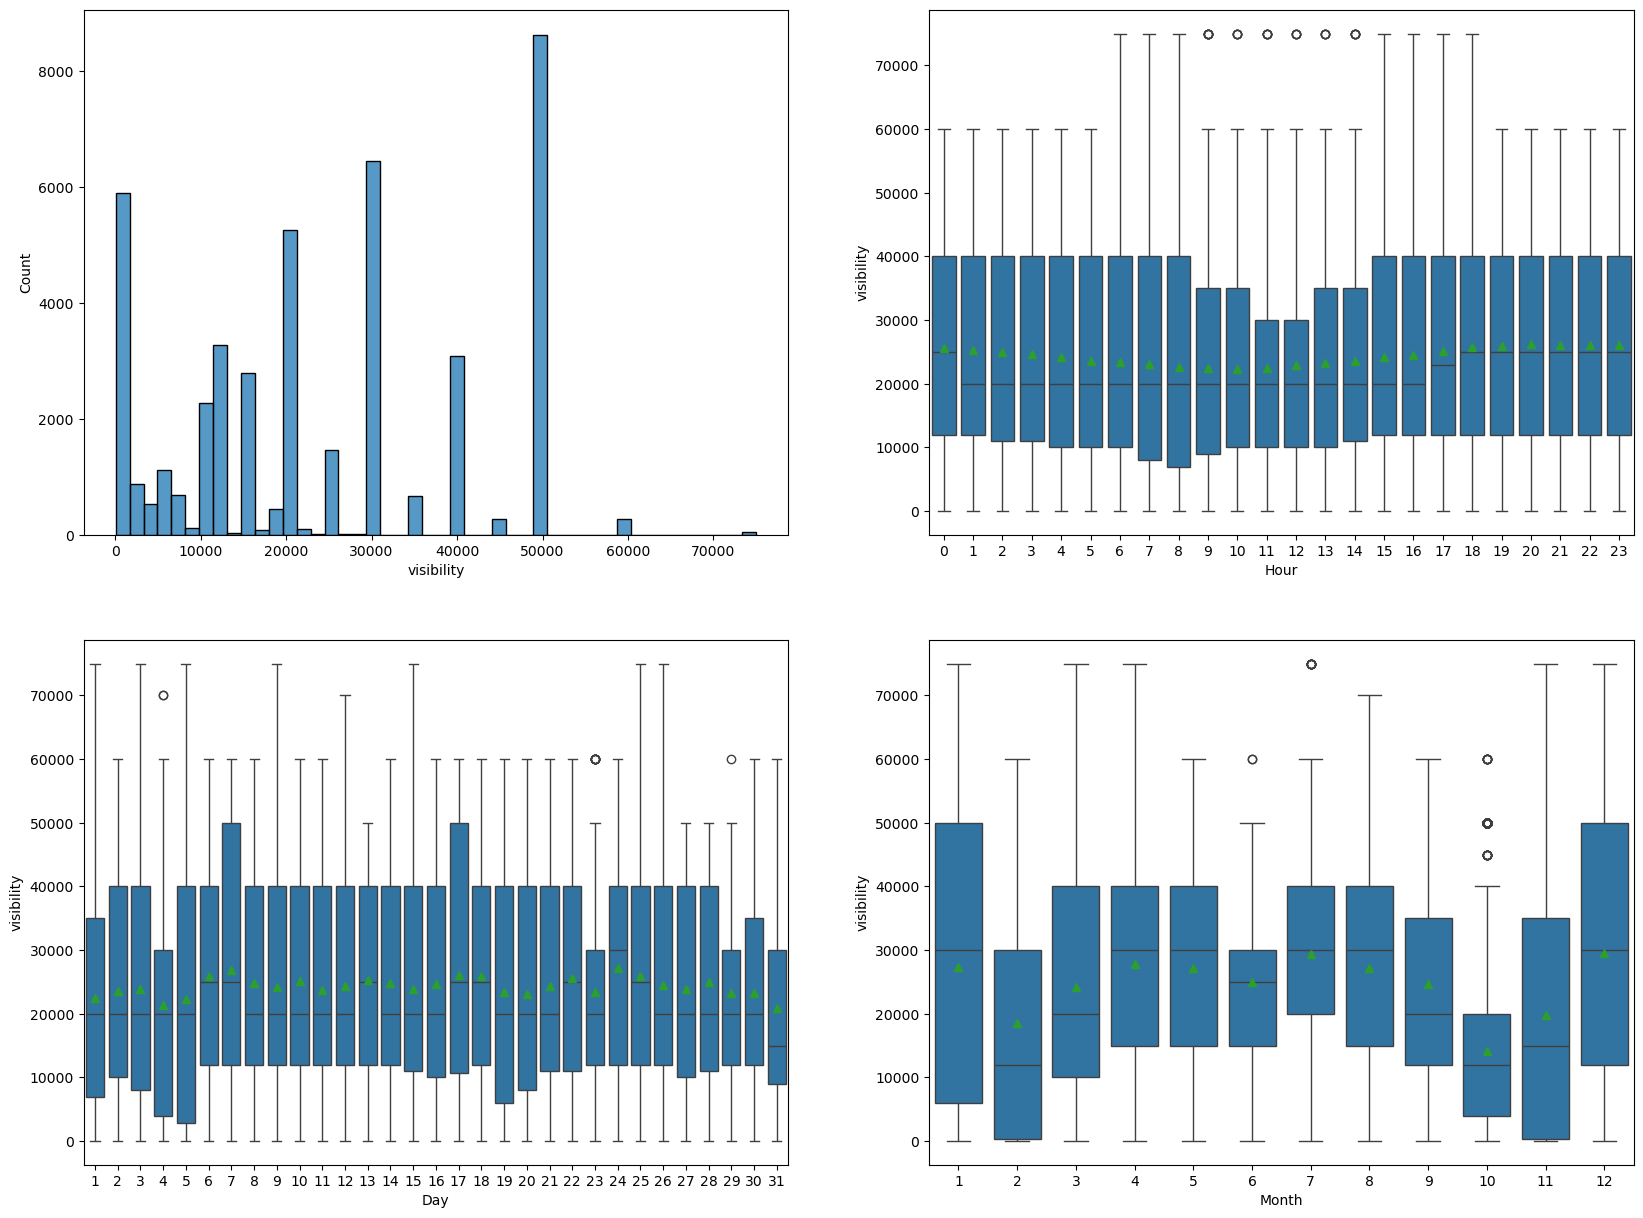

In [13]:
var = df['visibility']
fig, ax = plt.subplots(2,2, figsize = (20,15))
sns.histplot(x= var, data=df, ax = ax[0, 0])
sns.boxplot(data = df, x = 'Hour', y = var, ax = ax[0, 1], showmeans=True)
sns.boxplot(data = df, x = 'Day', y = var, ax = ax[1, 0], showmeans=True)
sns.boxplot(data = df, x = 'Month', y = var, ax = ax[1, 1], showmeans=True)
plt.show()

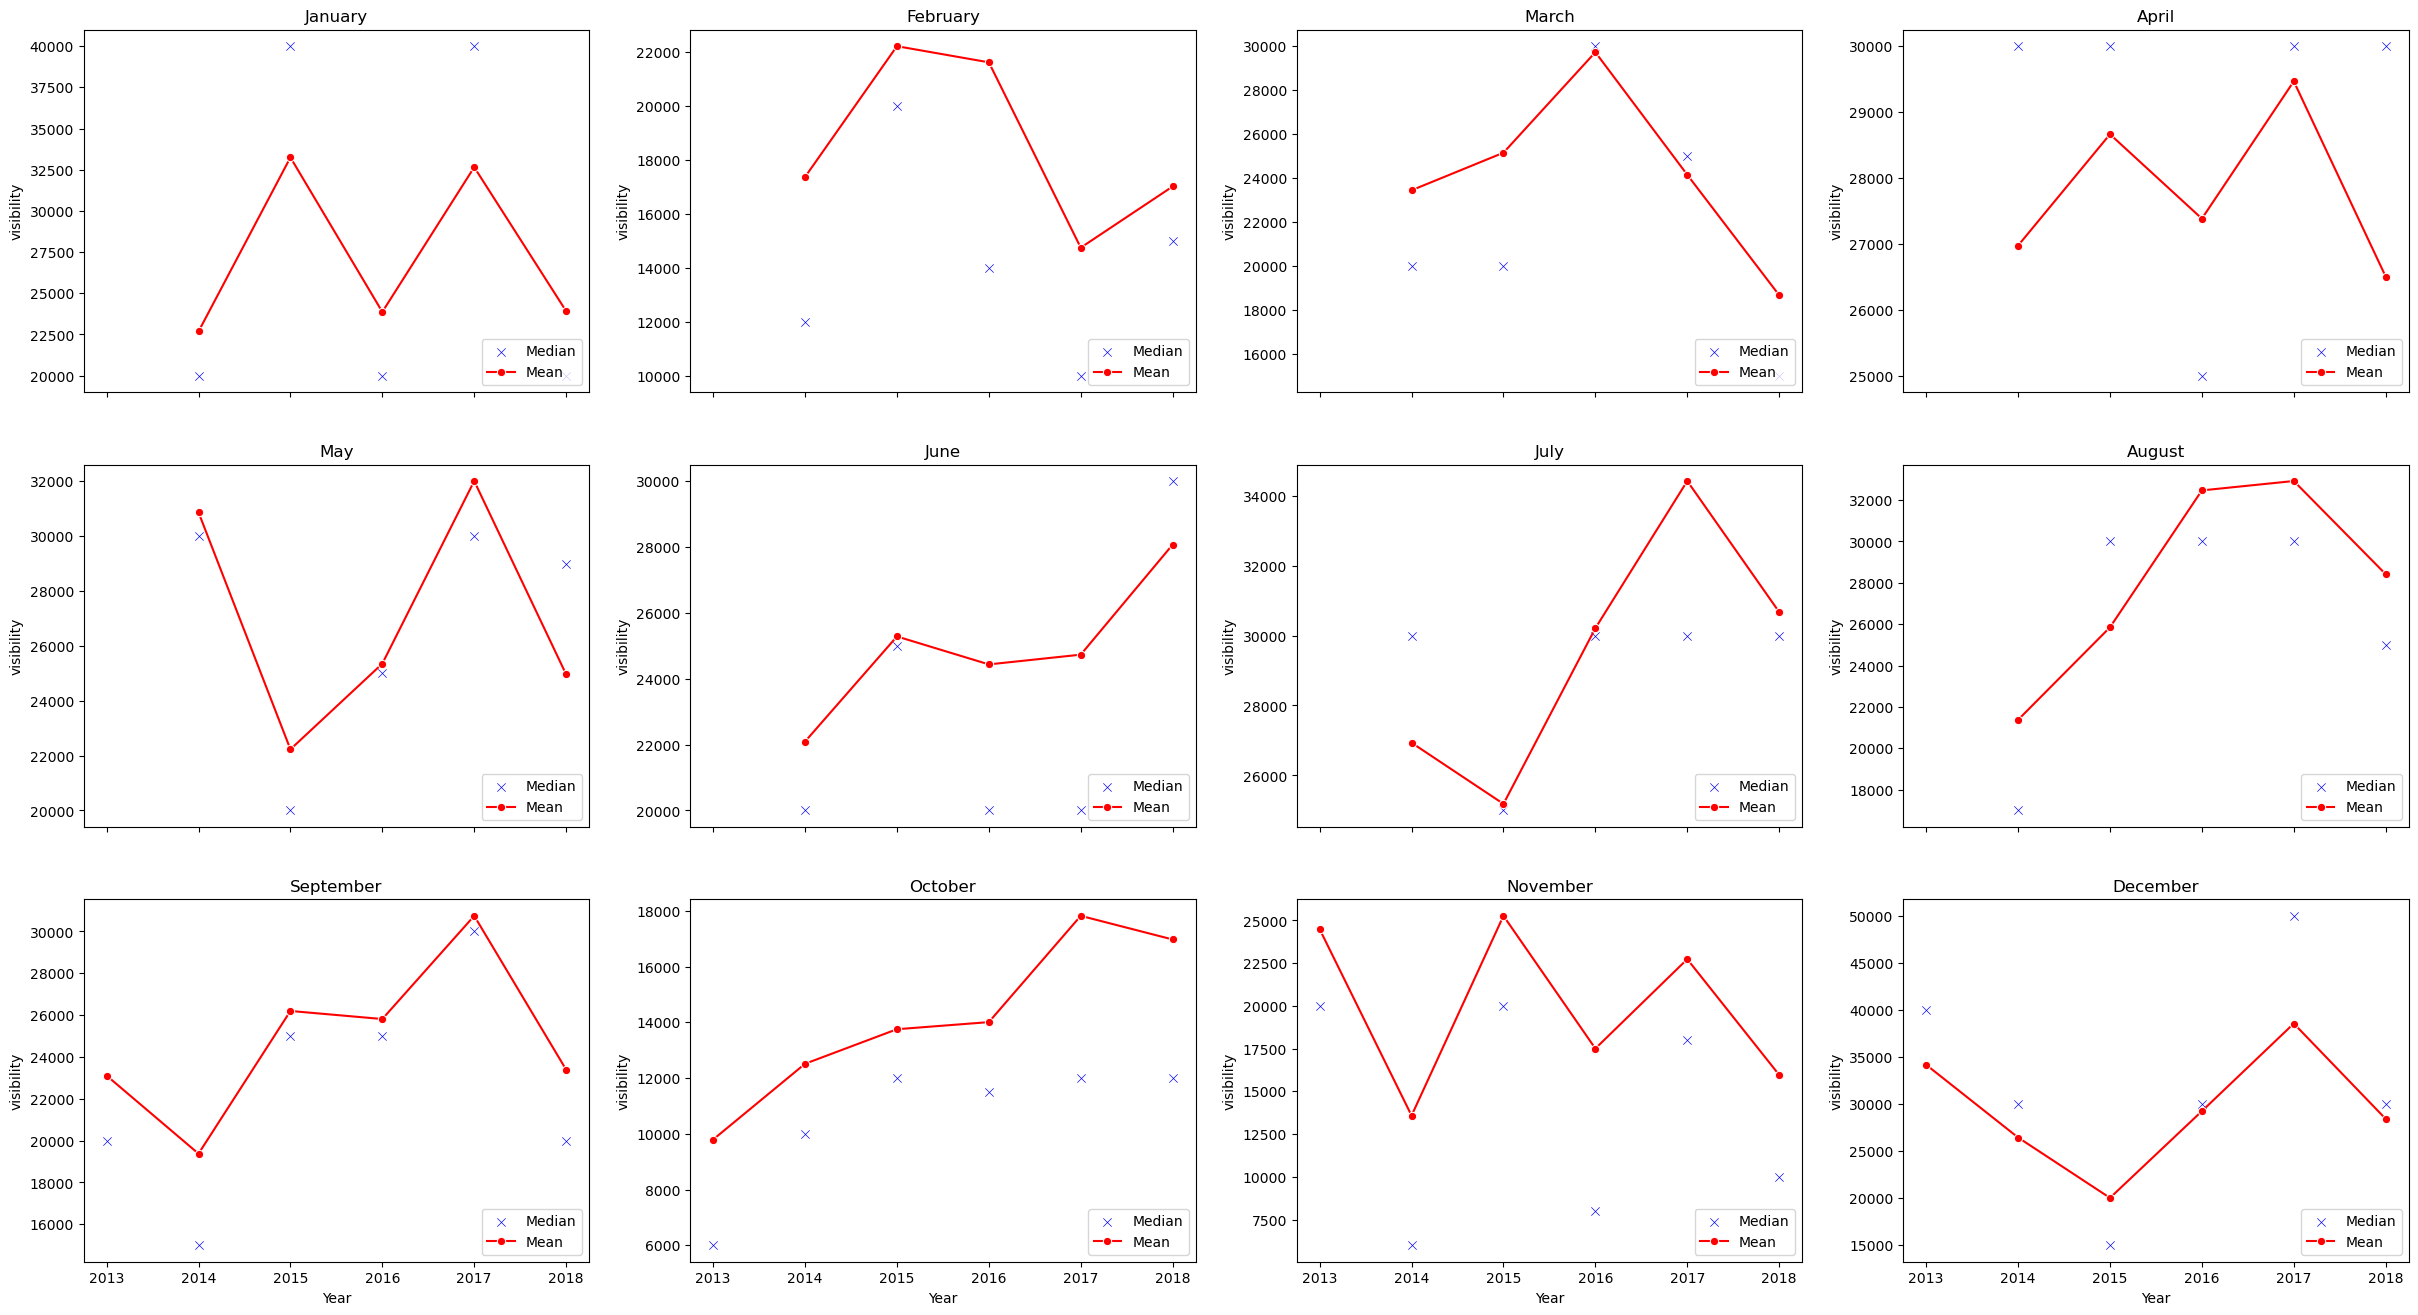

In [14]:
tst = df.groupby(['Year', 'Month'], as_index=False).agg(median=('visibility','median'), mean=('visibility','mean'))
fig,axes = plt.subplots(3, 4, figsize = (30,16), sharex=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
row, col = 0, 0

for i in range(1,13):
    
    ax = axes[row, col]
    sns.scatterplot(data = tst[tst['Month'] == i], x = 'Year', y = 'median', marker = 'x', color = 'blue', ax = ax, label = 'Median')
    sns.lineplot(data = tst[tst['Month'] == i], x = 'Year', y = 'mean', marker = 'o', color = 'red', ax = ax, label = 'Mean')

    ax.set_title(months[i-1])
    ax.set_ylabel('visibility')
    ax.legend(loc='lower right')

    col += 1
    if col % 4 == 0:
        col = 0
        row += 1



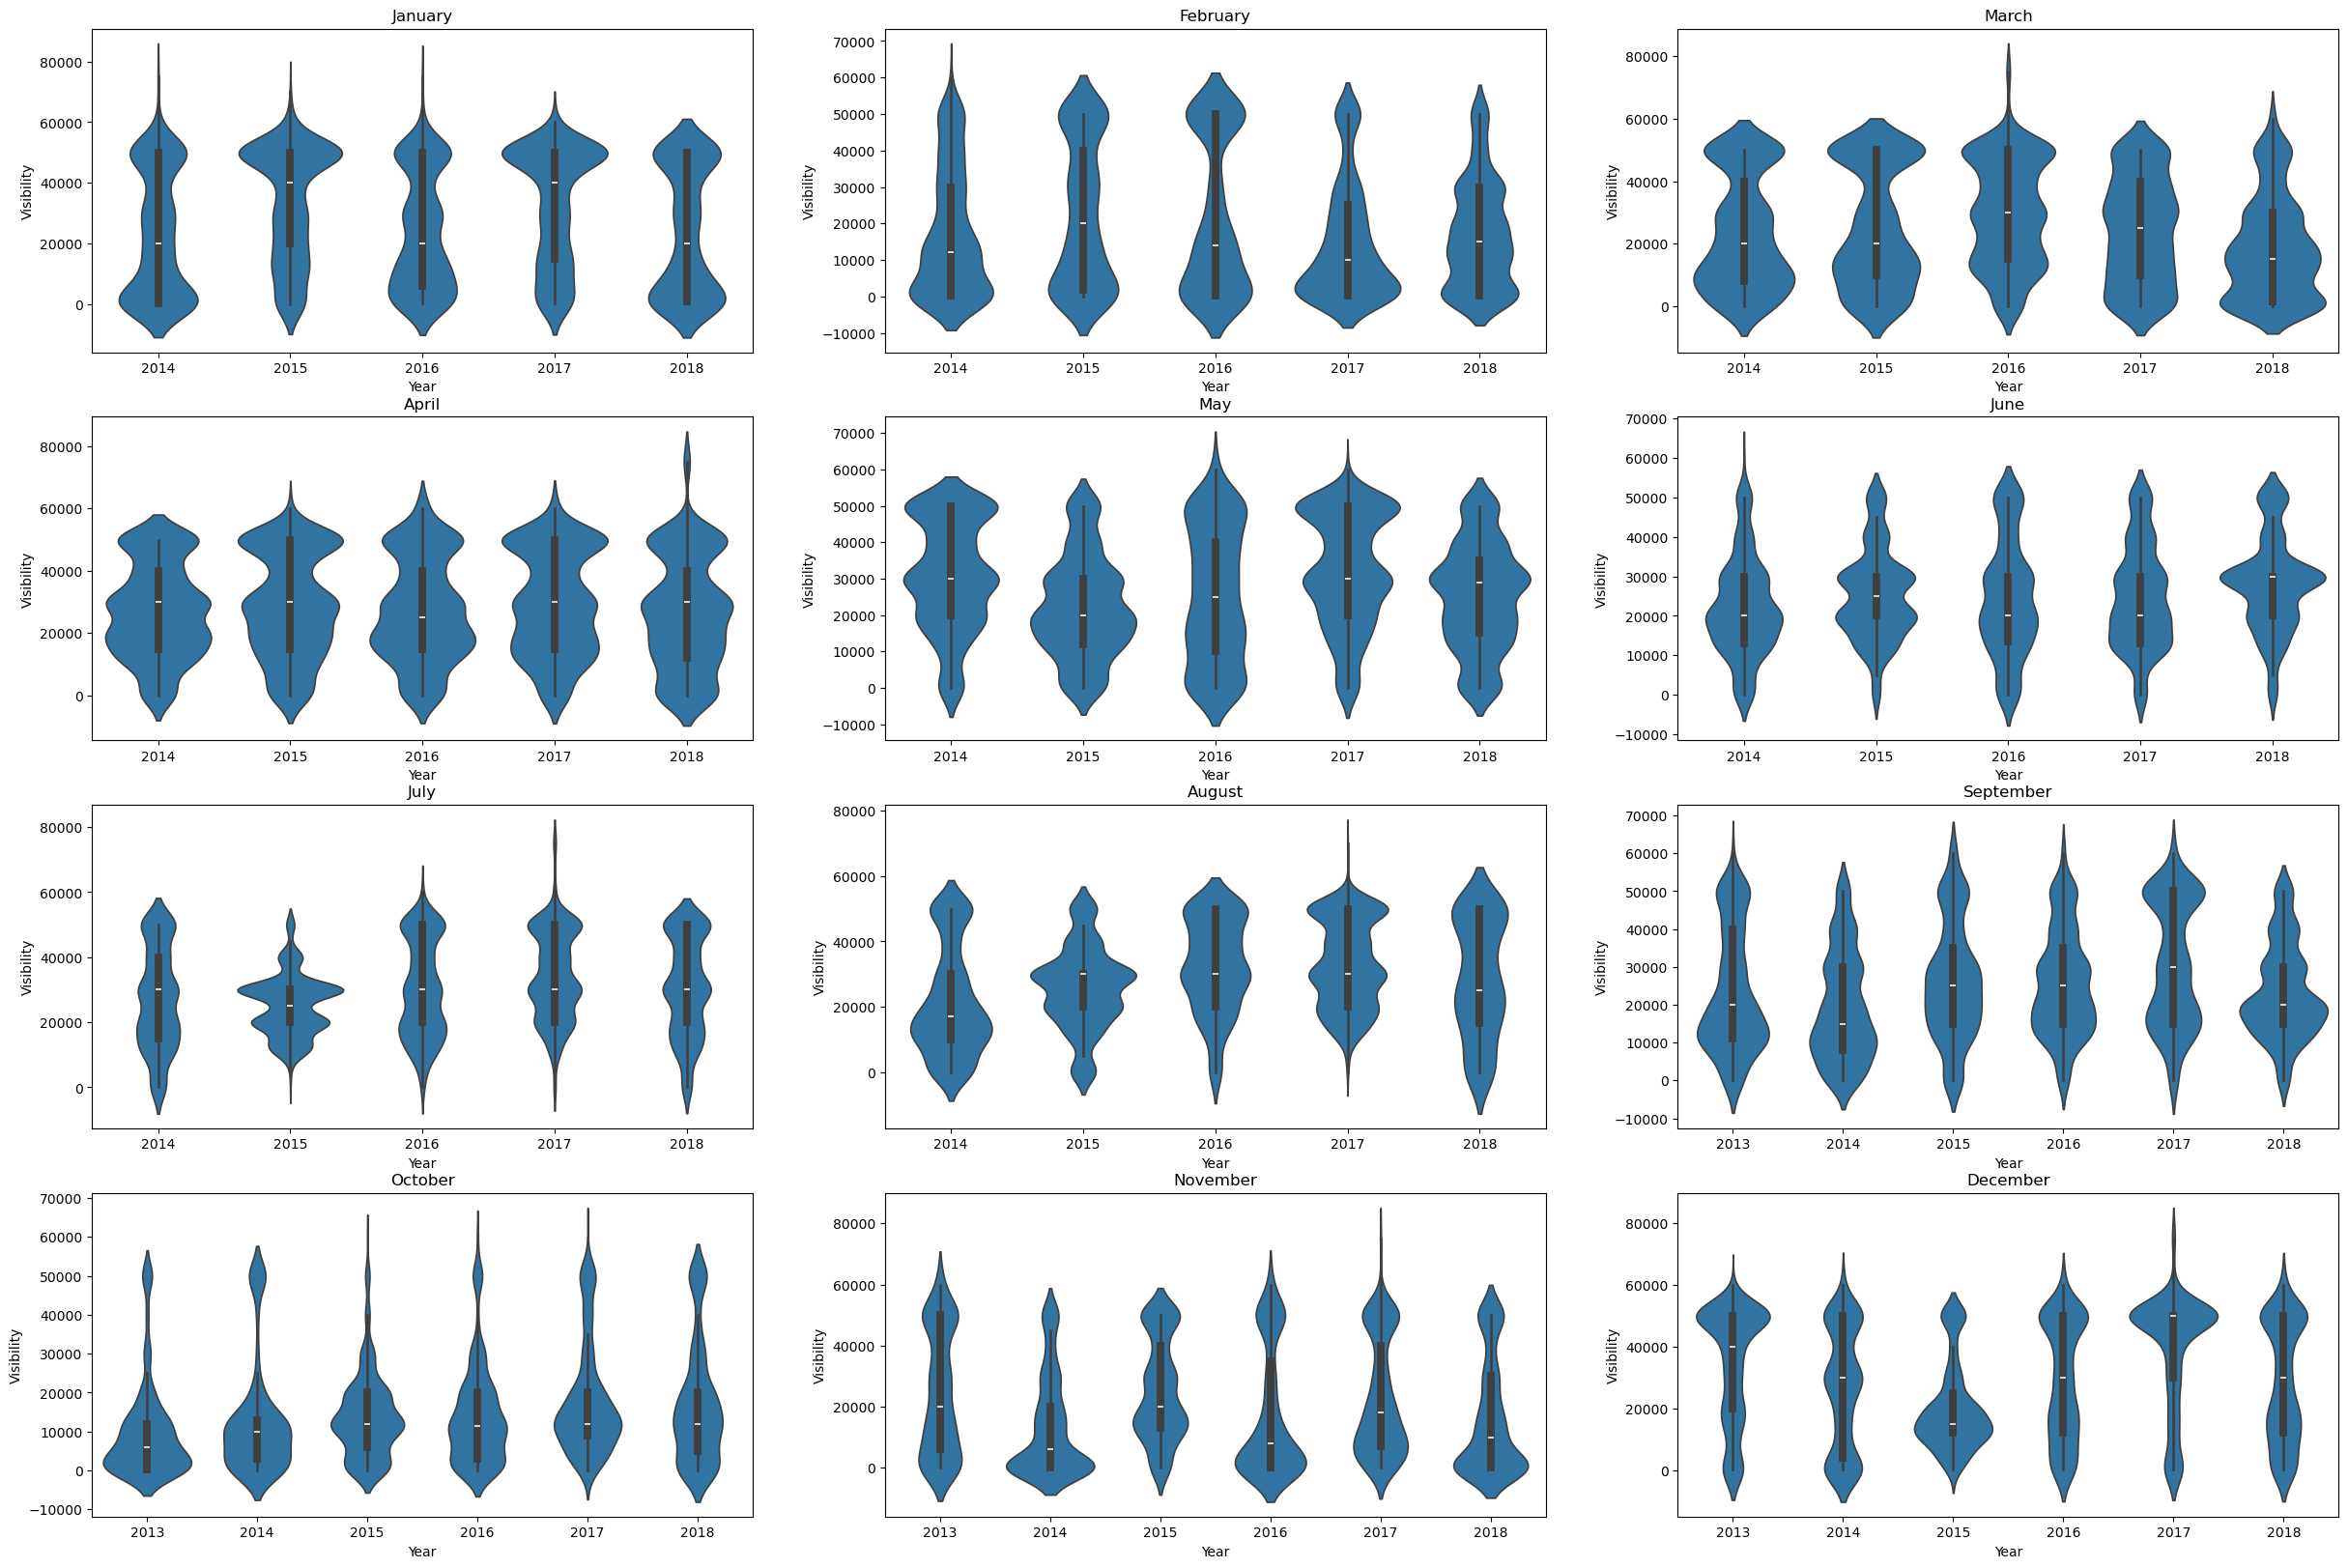

In [16]:
fig,axes = plt.subplots(4, 3, figsize = (30,20))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
row, col = 0, 0

for i in range(1,13):
    
    ax = axes[row, col]
    sns.violinplot(data = df[df['Month'] == i], x = 'Year', y = 'visibility', ax = ax)
    

    ax.set_title(months[i-1])
    ax.set_ylabel('Visibility')
    

    col += 1
    if col % 3 == 0:
        col = 0
        row += 1

## Fog
Creation of the targe. The whole project is based on using machine learning in order to predict if at a certain hour there will be low visibility (a condition that we called **FOG**). We created this target on the base of the *visibility* column. So if the visibility drops under 1000 fog will be marked as True.

In [17]:
df['fog']=0
df['fog'][df['visibility']<=1000]=1

frac = df[df['fog'] == 1].shape[0] / df.shape[0]
pct = round(frac * 100, 2)
print(f'The percentage of fog cases is {pct}%')


The percentage of fog cases is 12.87%


C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\2649308777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fog'][df['visibility']<=1000]=1


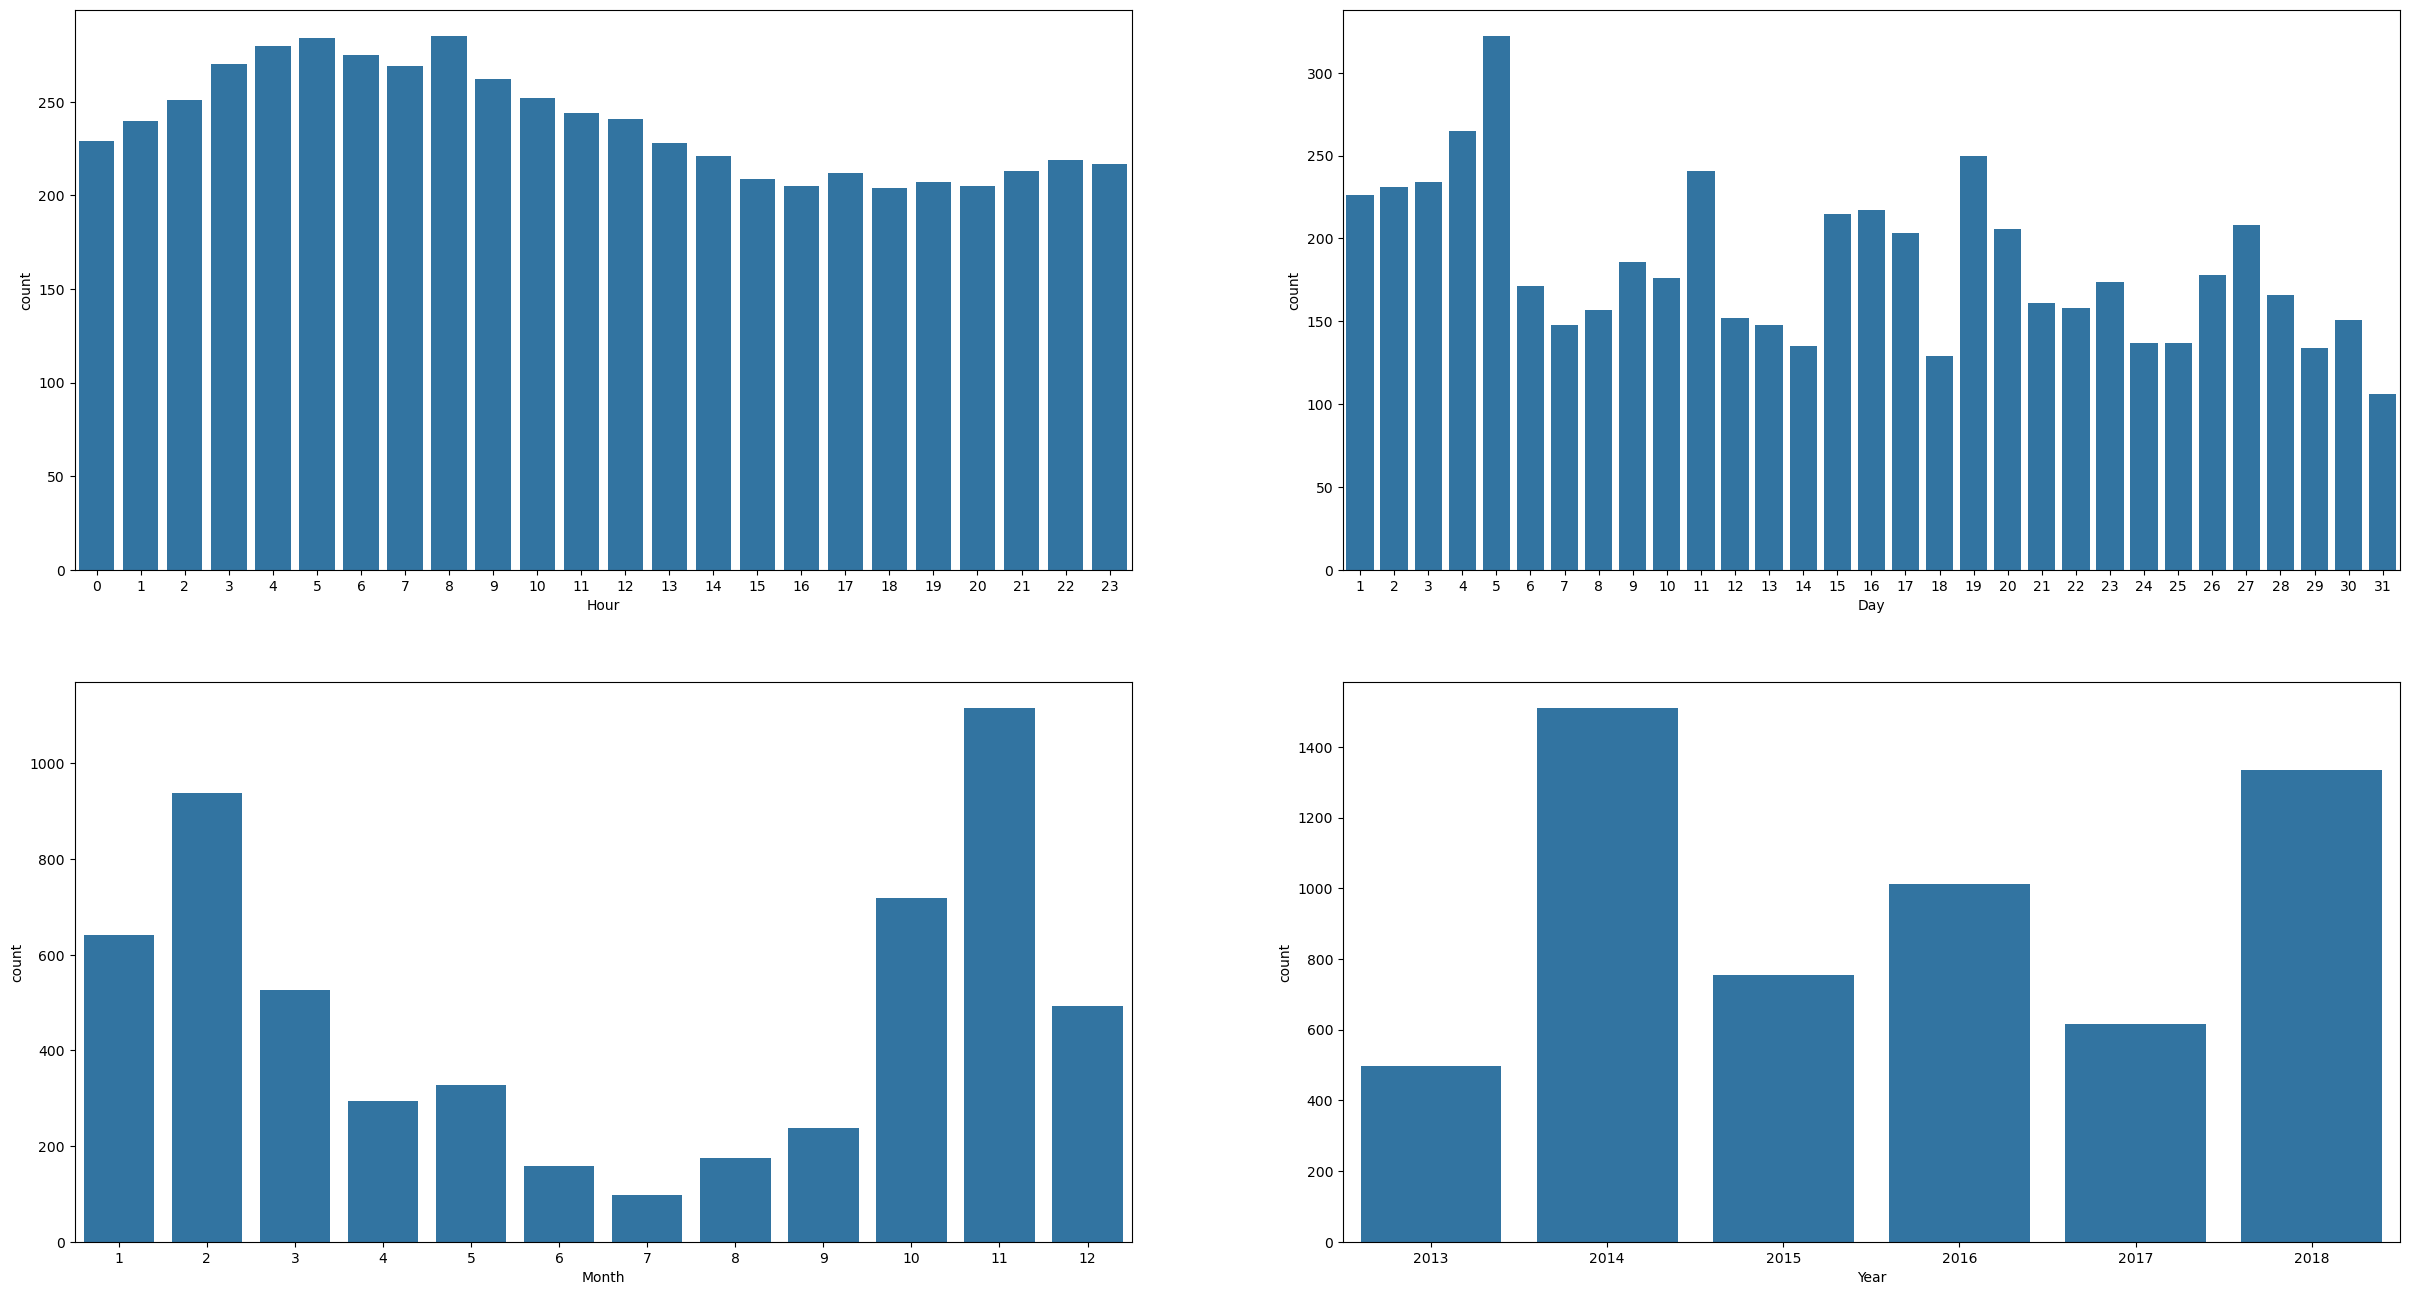

In [19]:
# DISTRIBUTION OF FOG CASES ON AN HOURLY, DAILY, MONTHLY AND YEARLY BASE

fig, ax = plt.subplots(2,2, figsize = (30,16))

sns.countplot(data = df[df['fog'] == 1], x = 'Hour', ax = ax[0, 0])
sns.countplot(data = df[df['fog'] == 1], x = 'Day', ax = ax[0, 1])
sns.countplot(data = df[df['fog'] == 1], x = 'Month', ax = ax[1, 0])
sns.countplot(data = df[df['fog'] == 1], x = 'Year', ax = ax[1, 1])
plt.show()

## Pressure

In [20]:
var = 'pressure'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

2 Nan out of 44452 data


### NaN imputation

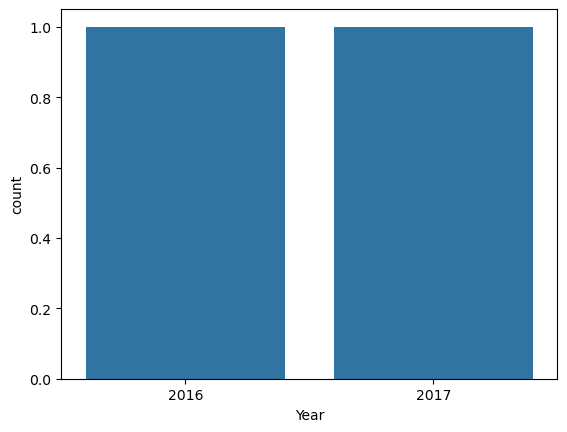

In [21]:
sns.countplot(data = df[['Year']][df[var].isna()], x = 'Year')
plt.show()

In [22]:
nan_ind = list(df[var][df[var].isna()].index)

prob = False
for ind in nan_ind:
    if (ind - 1) in nan_ind or (ind + 1) in nan_ind:
        print(f'There is a consecutive Nan for this variable at index {ind}!')
        prob = True
if prob is False:
    print("There aren't consecutive Nan for this variable!")

There aren't consecutive Nan for this variable!


In [23]:
tmp = []

for i in nan_ind:
    tmp.append(i)
    tmp.append(i+1)

b = df[[var, 'date_diff']][df.index.isin(tmp)]
if b[b['date_diff'] > 3].shape[0] > 0:
    
    display(b[b['date_diff'] > 3])
    
for ind in nan_ind:
    df[var][ind] = (df[var][ind-1] + df[var][ind+1])/2

C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\122593258.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var][ind] = (df[var][ind-1] + df[var][ind+1])/2


### Visualization

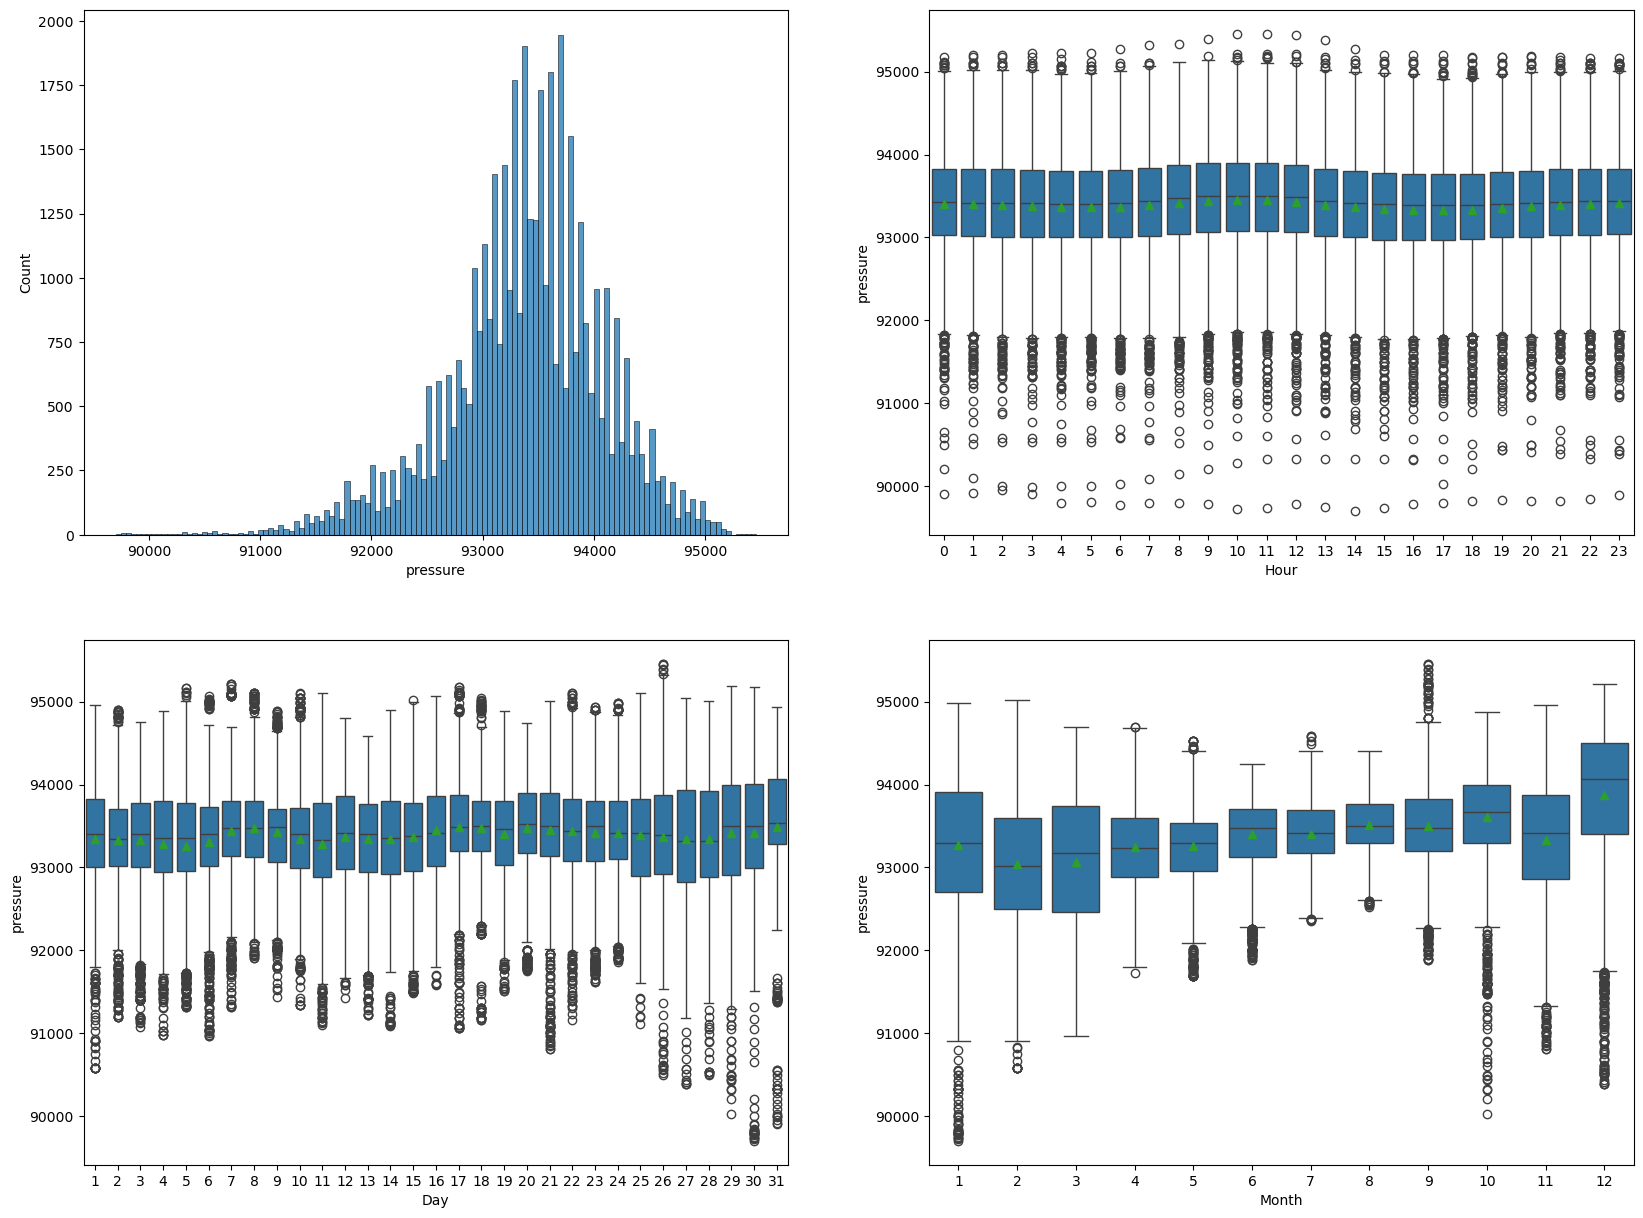

In [24]:
fig, ax = plt.subplots(2,2, figsize = (20,15))
sns.histplot(x= var, data=df, ax = ax[0, 0])
sns.boxplot(data = df, x = 'Hour', y = var, ax = ax[0, 1], showmeans=True)
sns.boxplot(data = df, x = 'Day', y = var, ax = ax[1, 0], showmeans=True)
sns.boxplot(data = df, x = 'Month', y = var, ax = ax[1, 1], showmeans=True)
plt.show()

In [25]:
kurtosis = df['pressure'].kurt(axis = 0)
kurtosis = round(kurtosis, 3)
skew = df['pressure'].skew(axis = 0)
skew = round(skew, 3)
print(f'The kurtosis is: {kurtosis}\nThe skewness is: {skew}')

The kurtosis is: 1.166
The skewness is: -0.57


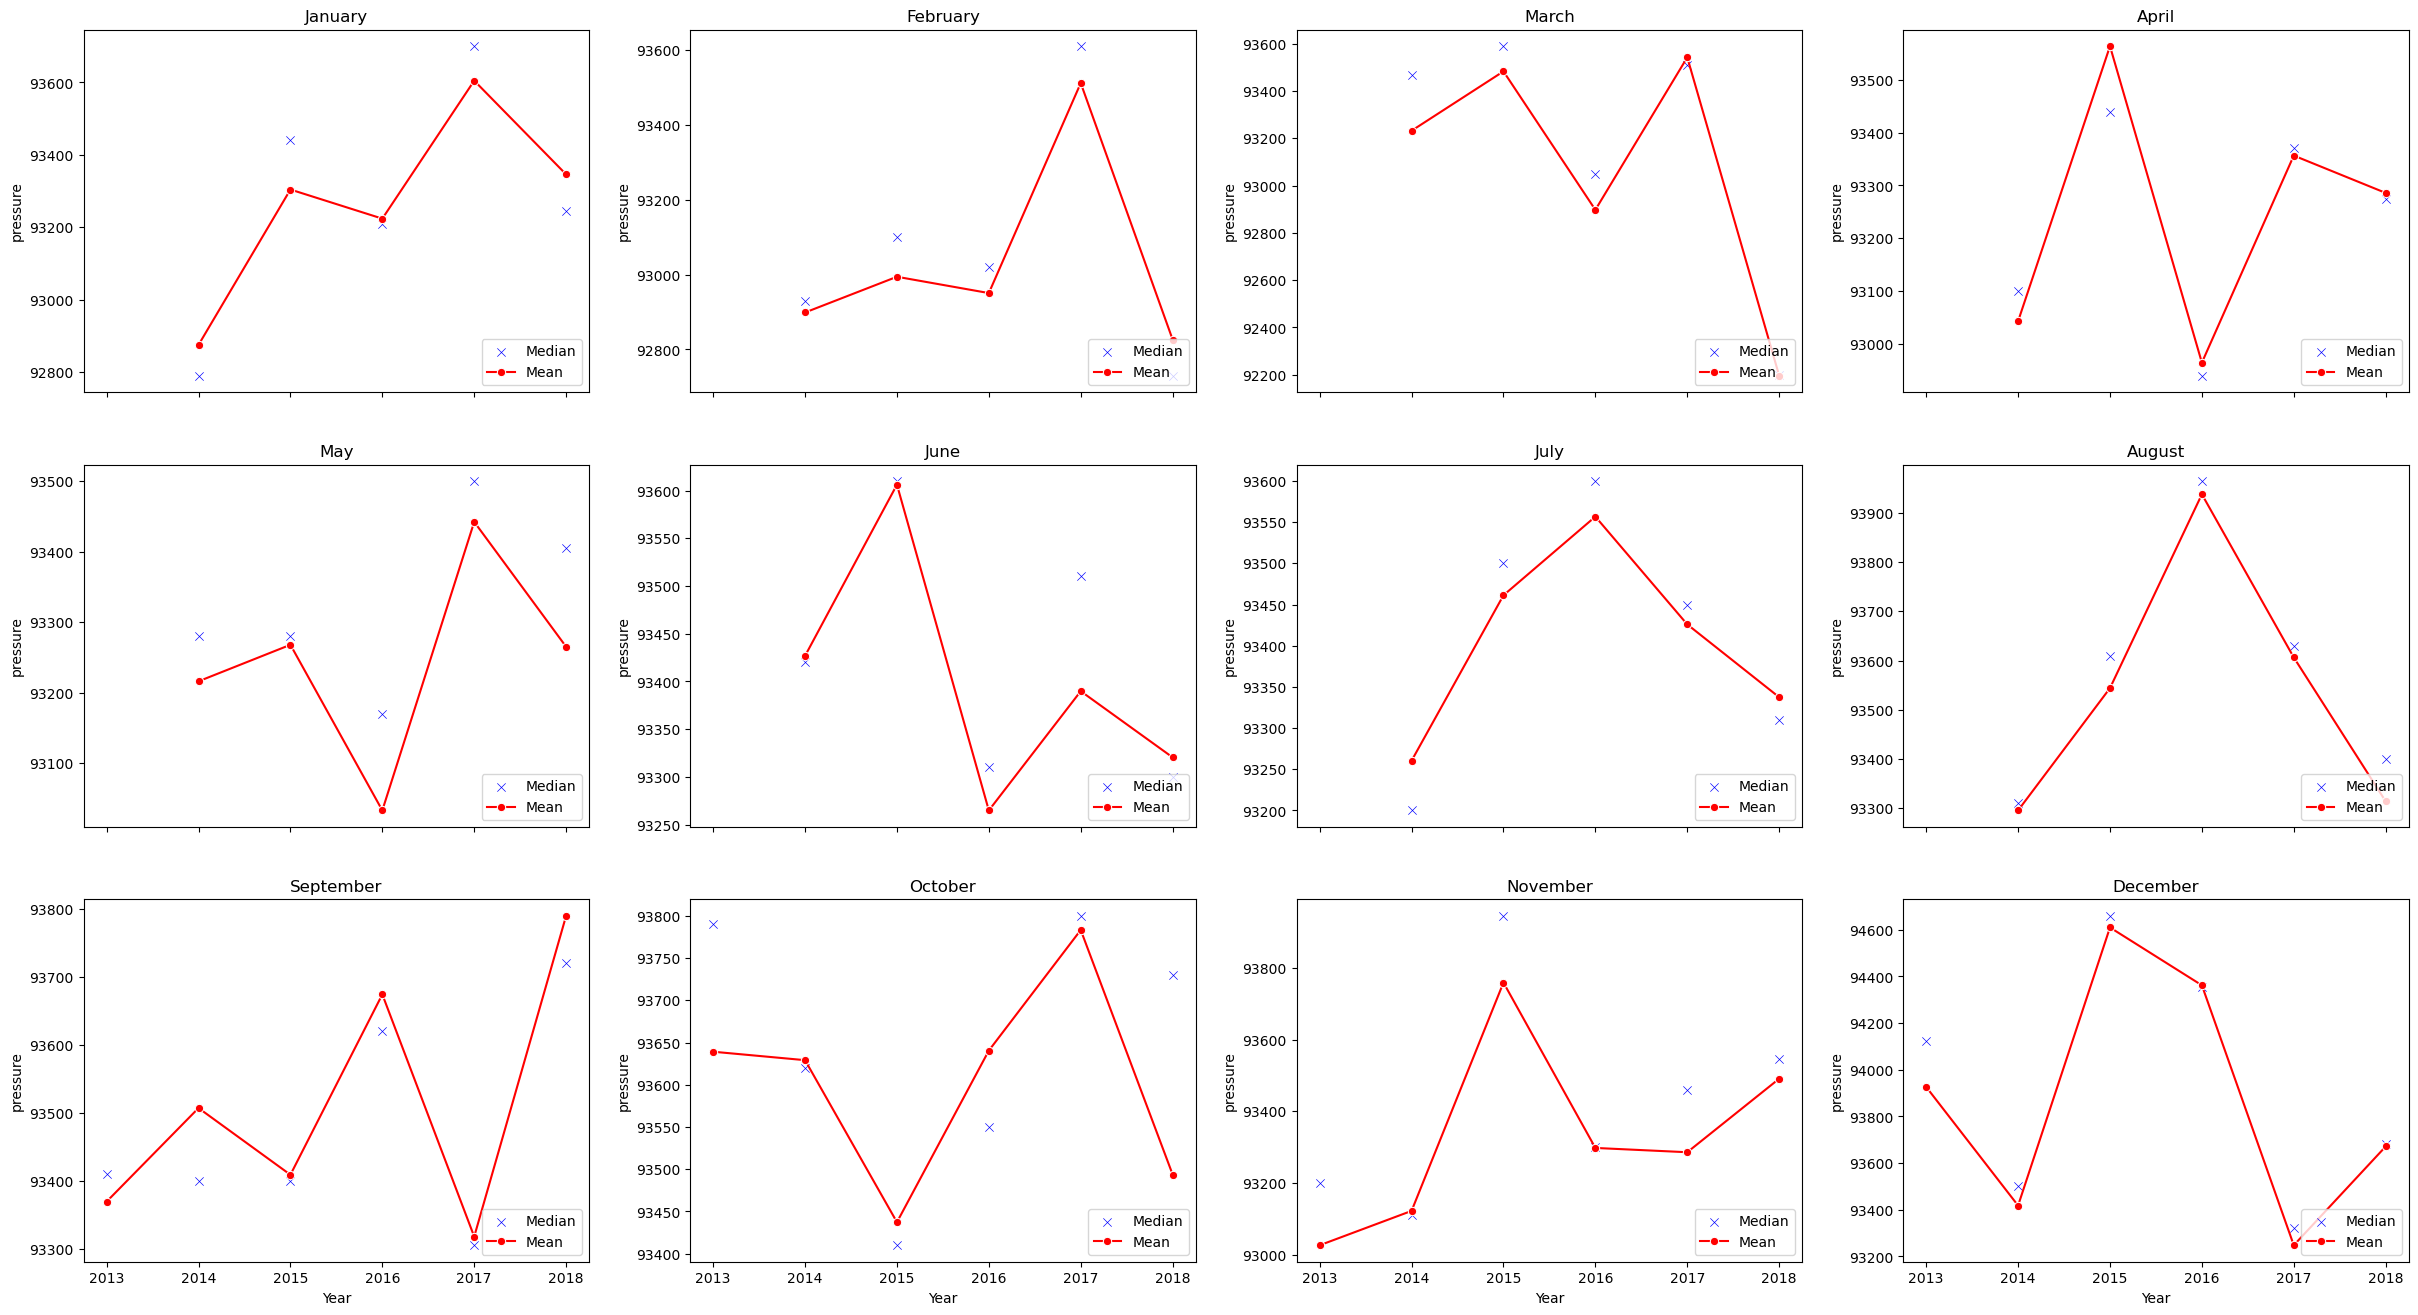

In [26]:
tst = df.groupby(['Year', 'Month'], as_index=False).agg(median=('pressure','median'), mean=('pressure','mean'))
fig,axes = plt.subplots(3, 4, figsize = (30,16), sharex=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
row, col = 0, 0

for i in range(1,13):
    
    ax = axes[row, col]
    sns.scatterplot(data = tst[tst['Month'] == i], x = 'Year', y = 'median', marker = 'x', color = 'blue', ax = ax, label = 'Median')
    sns.lineplot(data = tst[tst['Month'] == i], x = 'Year', y = 'mean', marker = 'o', color = 'red', ax = ax, label = 'Mean')

    ax.set_title(months[i-1])
    ax.set_ylabel('pressure')
    ax.legend(loc='lower right')

    col += 1
    if col % 4 == 0:
        col = 0
        row += 1

## three_hour_pressure_change

In [27]:
df.isna().sum()

date                             0
pressure                         0
three_hour_pressure_change      32
char_pressure_tendency          32
wind_direction                   0
wind_speed                       0
visibility                       0
present_weather                  2
past_weather1                    3
past_weather2                    3
cloud_cover                   5705
cloud_type                       0
drybulb                          2
dewpoint                         1
Year                             0
Month                            0
Day                              0
Hour                             0
Julian                           0
date_diff                        0
fog                              0
dtype: int64

In [28]:
var = 'three_hour_pressure_change'
nan_ind = list(df[var][df[var].isna()].index)

prob = False
for ind in nan_ind:
    if (ind - 1) in nan_ind or (ind + 1) in nan_ind:
        print(f'There is a consecutive Nan for this variable at index {ind}!')
        prob = True
if prob is False:
    print("There aren't consecutive Nan for this variable!")

There aren't consecutive Nan for this variable!


In [29]:
tmp = []

for i in nan_ind:
    tmp.append(i)
    tmp.append(i+1)

b = df[[var, 'date_diff']][df.index.isin(tmp)]
if b[b['date_diff'] > 3].shape[0] > 0:
    
    display(b[b['date_diff'] > 3])
    
for ind in nan_ind:
    df[var][ind] = df['pressure'][ind] + df['pressure'][ind-3]

C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\2784480377.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var][ind] = df['pressure'][ind] + df['pressure'][ind-3]


## Present weather

In [30]:
var = 'present_weather'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

2 Nan out of 44452 data


In [31]:
## NaN imputation

nan_ind = list(df[df['present_weather'].isna()].index)

for ind in nan_ind:
    if df['present_weather'][ind-1] == df['present_weather'][ind+1]:
        df['present_weather'][ind] = df['present_weather'][ind+1]

df['present_weather'] = df['present_weather'].astype(int)

C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\2638651923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['present_weather'][ind] = df['present_weather'][ind+1]


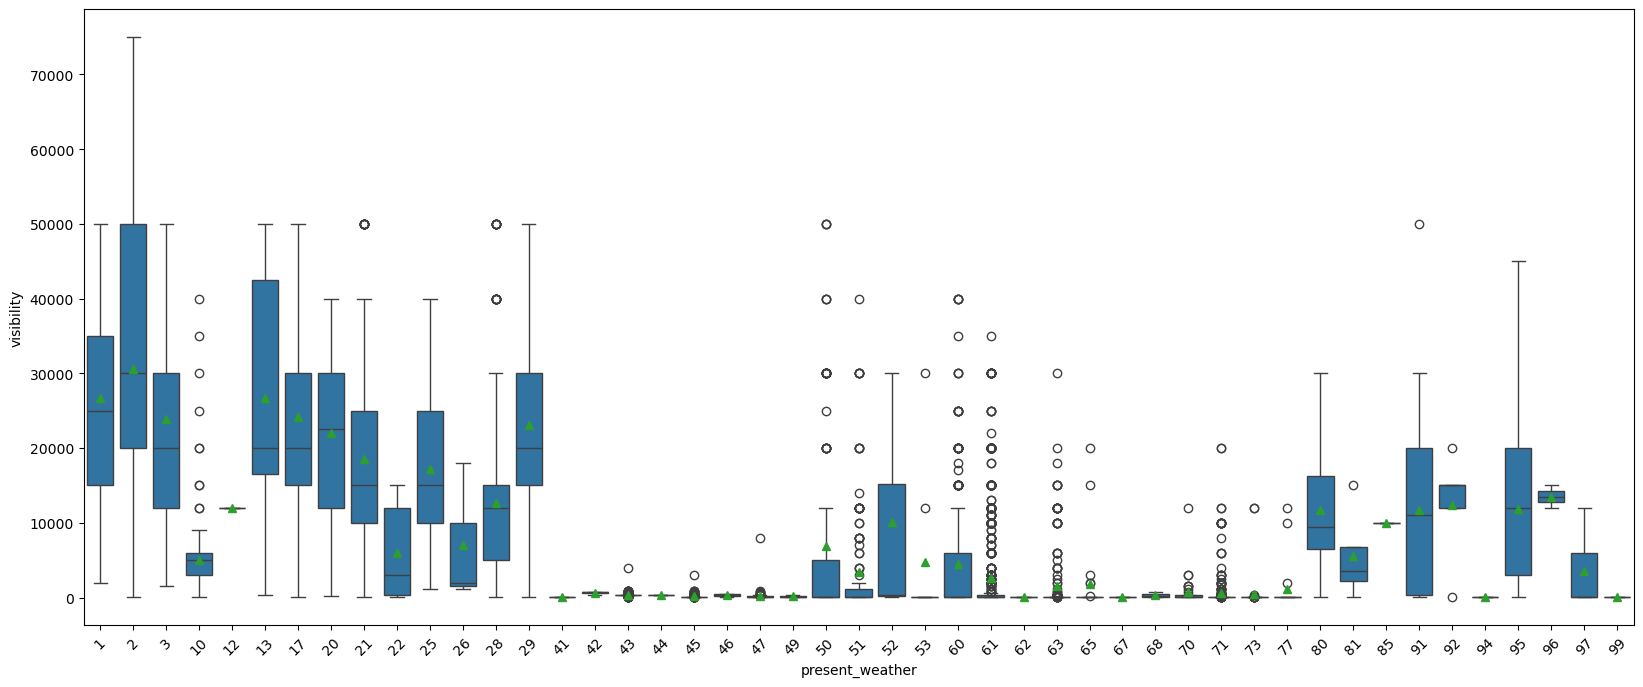

In [32]:
fig, axes = plt.subplots(1,1, figsize = (20, 8))
sns.boxplot(data = df, x  ='present_weather', y = 'visibility', showmeans = True)
plt.xticks(rotation = 45)
plt.show()

### New Present Weather

In [33]:
values = [(0,1,2,3), (4,5,6,7,8,9), (10,), (11,12), (13,), (14, 15, 16), (17,), (18,), (19,),
          (20,), (21,), (22,), (23,), (24,), (25,), (26,), (27,), (28,), (29,), range(30,40), range(40, 50), range(50,60),
          range(60,70), range(70, 80), range(80, 100)]

values_new = list(range(1, 26))

df['new_pres_weath'] = 0

for i in range(len(values)):
    df['new_pres_weath'][df['present_weather'].isin(values[i])] = values_new[i]

C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\898635501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_pres_weath'][df['present_weather'].isin(values[i])] = values_new[i]
C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\898635501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_pres_weath'][df['present_weather'].isin(values[i])] = values_new[i]
C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\898635501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [34]:
values = [[0,19], [2], [1,3], [6,7,8,9,30,31,32,33,34,35], [4,5,10,11,12,28,40,41,42,43,44,45,46,47,48,49],
          [20,50,51,52,53,54,55,56,57,58,59],[14,15,16,21,23,60,61,62,63,64,65,66,67,68,69],[22,23,36,37,38,39,70,71,72,73,74,75,76,77,78,79],
          [18,25,26,27,80,81,82,83,84,85,86,87,88,89],[13,17,29,90,91,92,93,94,95,96,97,98,99]]

values_new = list(range(10))

df['new_pres_weath'] = 0

for i in range(len(values)):
    df['new_pres_weath'][df['present_weather'].isin(values[i])] = values_new[i]

C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\3879311432.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_pres_weath'][df['present_weather'].isin(values[i])] = values_new[i]
C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\3879311432.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_pres_weath'][df['present_weather'].isin(values[i])] = values_new[i]
C:\Users\gltut\AppData\Local\Temp\ipykernel_17220\3879311432.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

<AxesSubplot:xlabel='new_pres_weath', ylabel='count'>

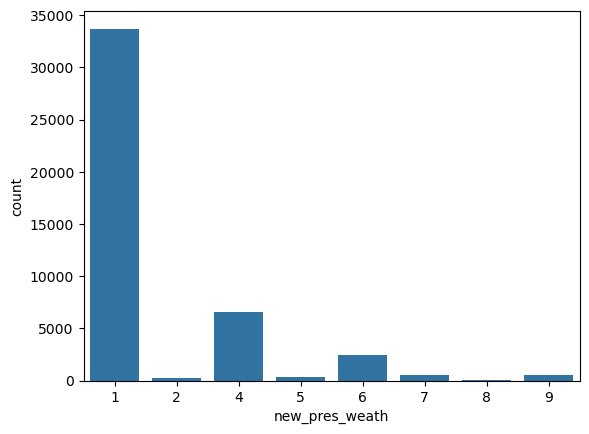

In [35]:
sns.countplot(data = df, x = 'new_pres_weath')

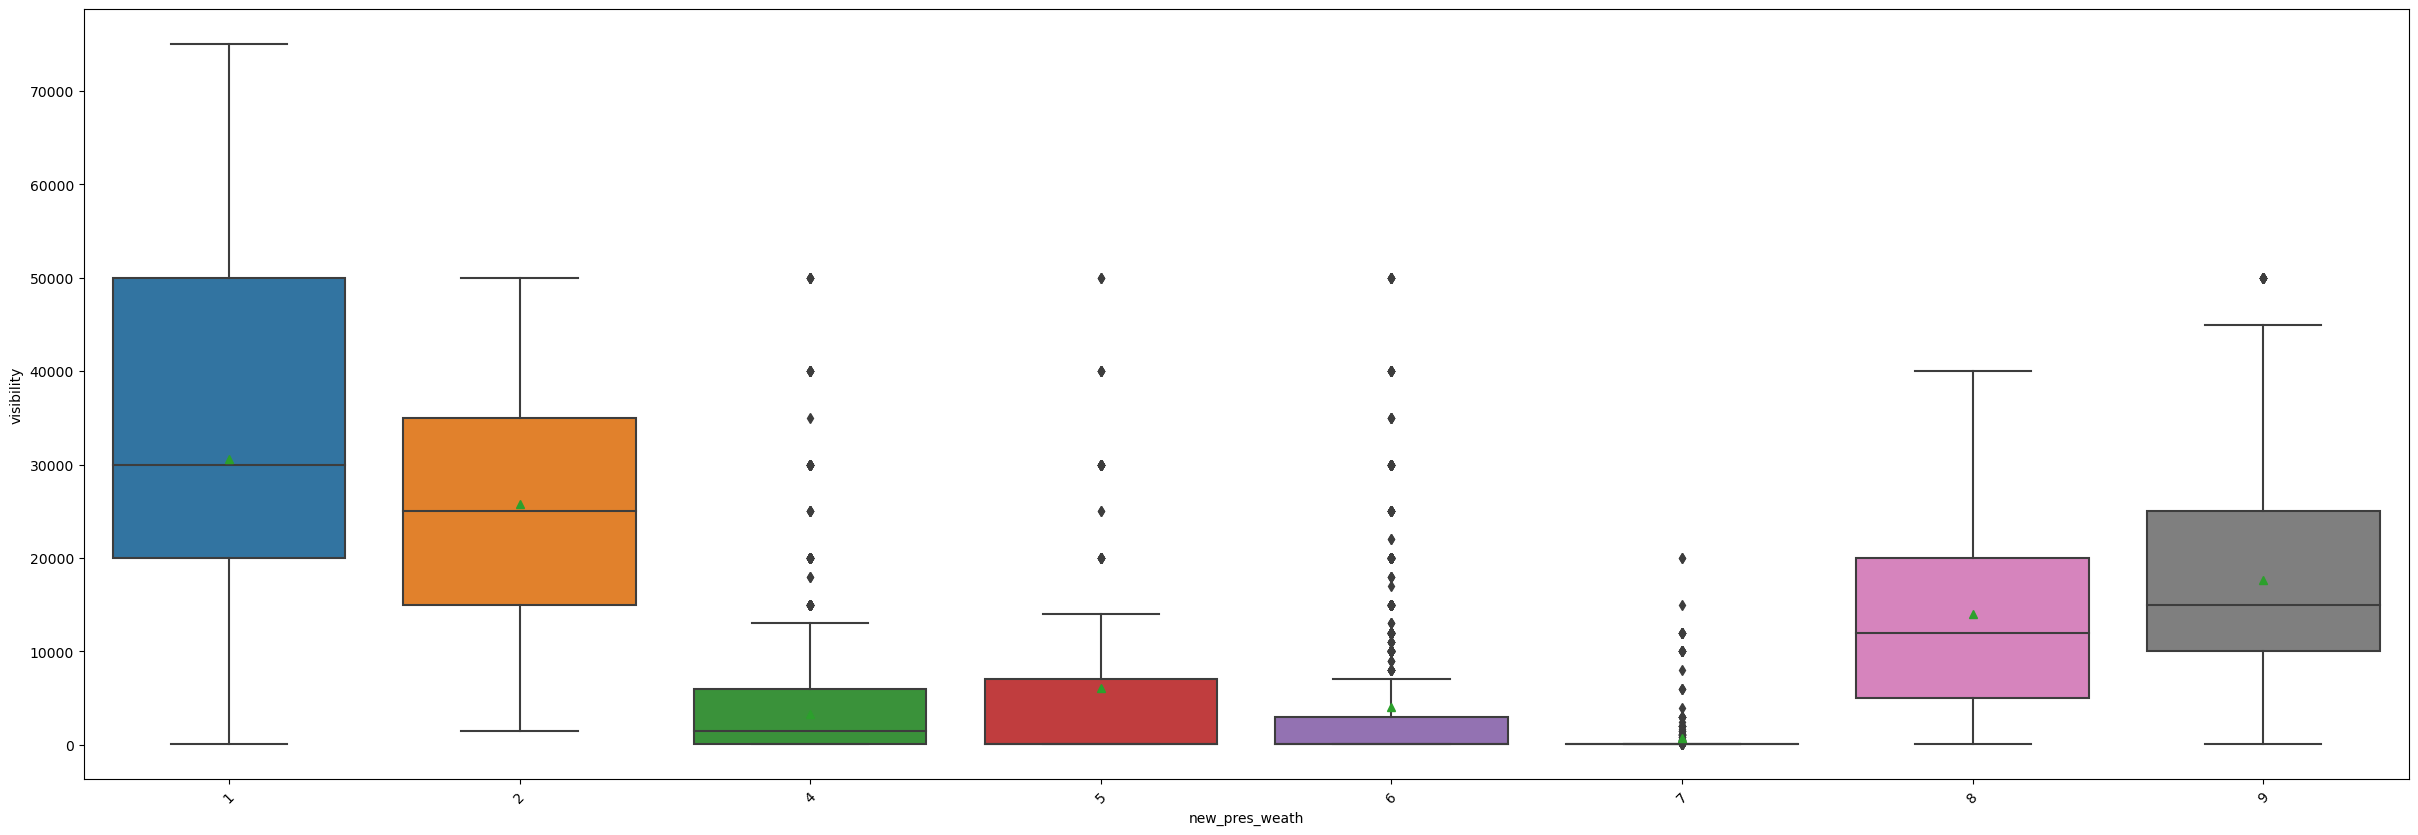

In [41]:
fig, axes = plt.subplots(1,1, figsize = (30, 10))
sns.boxplot(data = df, x  ='new_pres_weath', y = 'visibility', showmeans = True)
plt.xticks(rotation = 45)
plt.show()

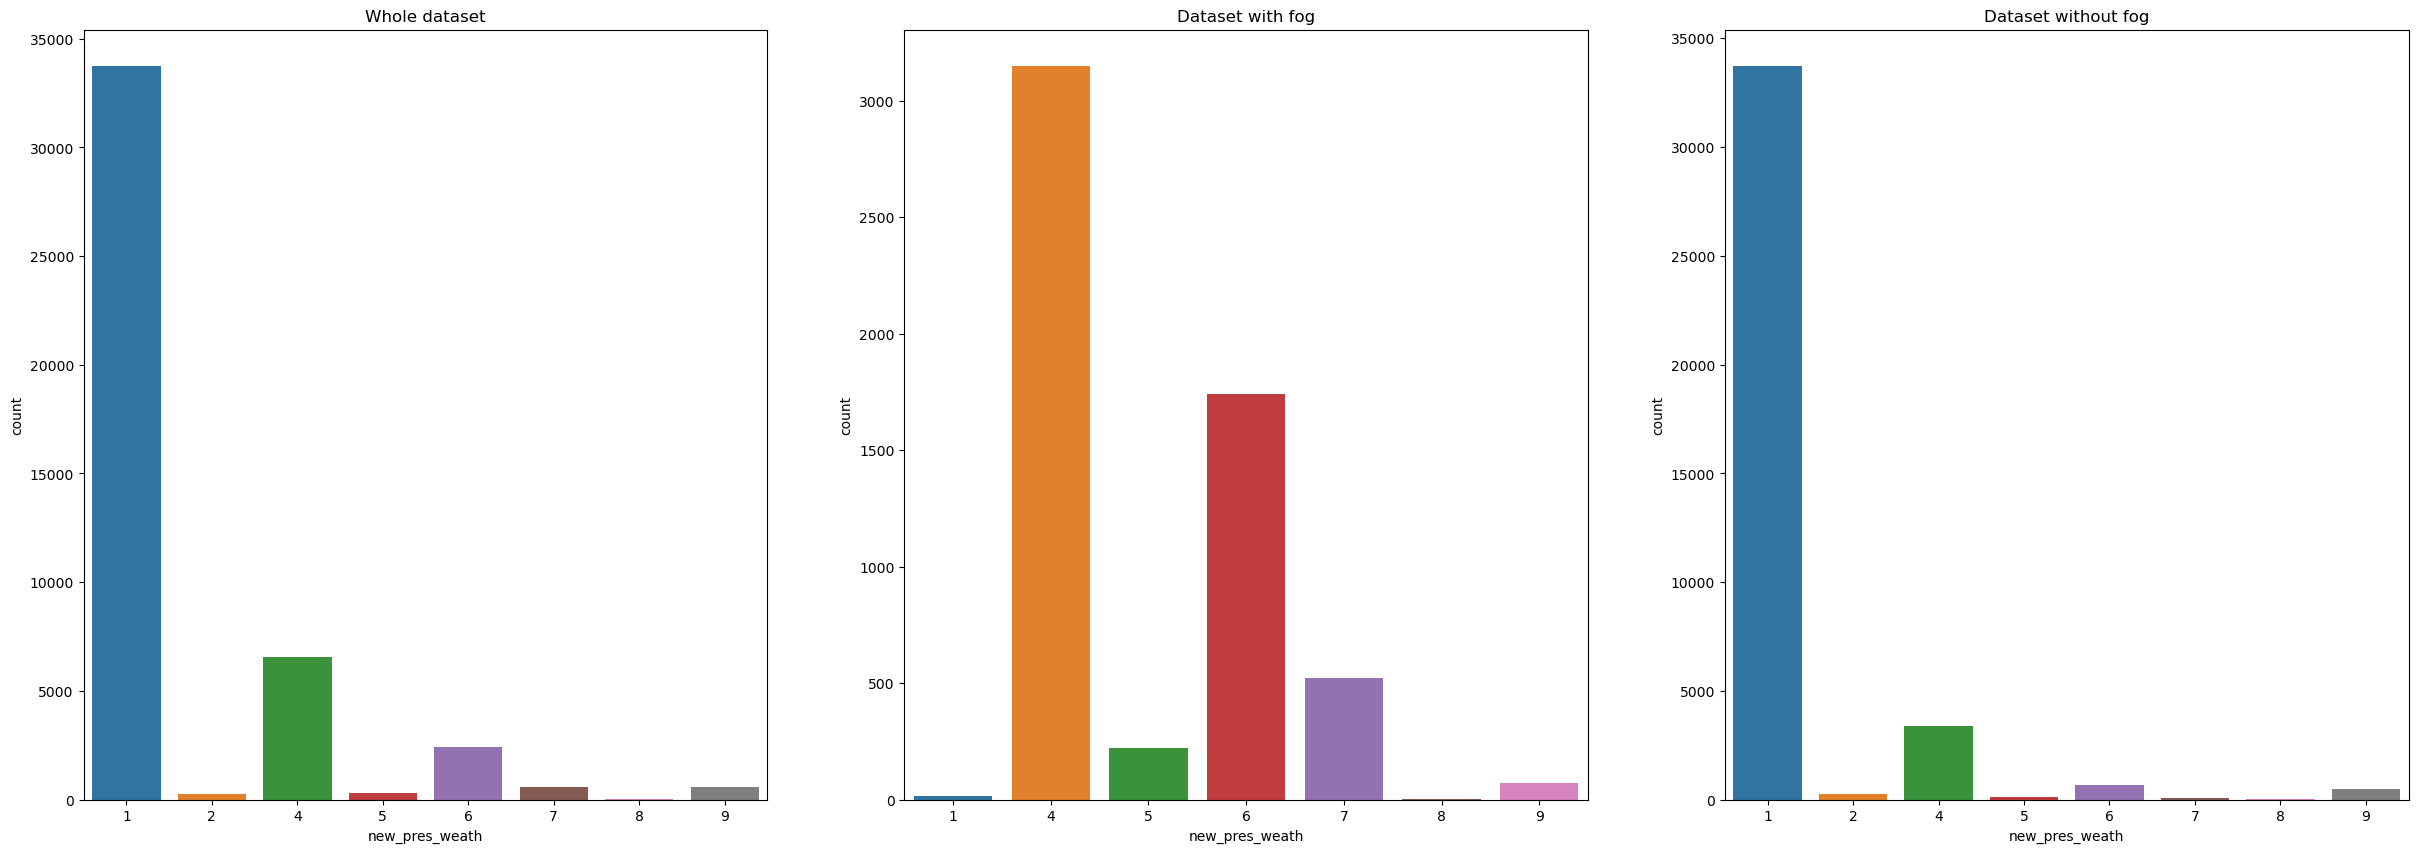

In [42]:
fig, axes = plt.subplots(1,3,figsize = (30,10))
sns.countplot(data = df, x = 'new_pres_weath', ax = axes[0])
sns.countplot(data = df[df['fog'] == 1], x = 'new_pres_weath', ax = axes[1])
sns.countplot(data = df[df['fog'] == 0], x = 'new_pres_weath', ax = axes[2])

axes[0].set_title('Whole dataset')
axes[1].set_title('Dataset with fog')
axes[2].set_title('Dataset without fog')
plt.show()

## Past weather 1/2

In [43]:
var = 'past_weather1'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

3 Nan out of 44452 data


In [44]:
## NaN imputation

nan_ind = list(df[df['past_weather1'].isna()].index)

for ind in nan_ind:
    df['past_weather1'][ind] = df['past_weather2'][ind + 1]

df['past_weather1'] = df['past_weather1'].astype(int)

C:\Users\gltut\AppData\Local\Temp\ipykernel_31192\1465452116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['past_weather1'][ind] = df['past_weather2'][ind + 1]


In [45]:
var = 'past_weather2'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

3 Nan out of 44452 data


In [46]:
## NaN imputation

nan_ind = list(df[df['past_weather2'].isna()].index)

for ind in nan_ind:
    df['past_weather2'][ind] = df['past_weather1'][ind - 1]

df['past_weather2'] = df['past_weather2'].astype(int)

C:\Users\gltut\AppData\Local\Temp\ipykernel_31192\612731425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['past_weather2'][ind] = df['past_weather1'][ind - 1]


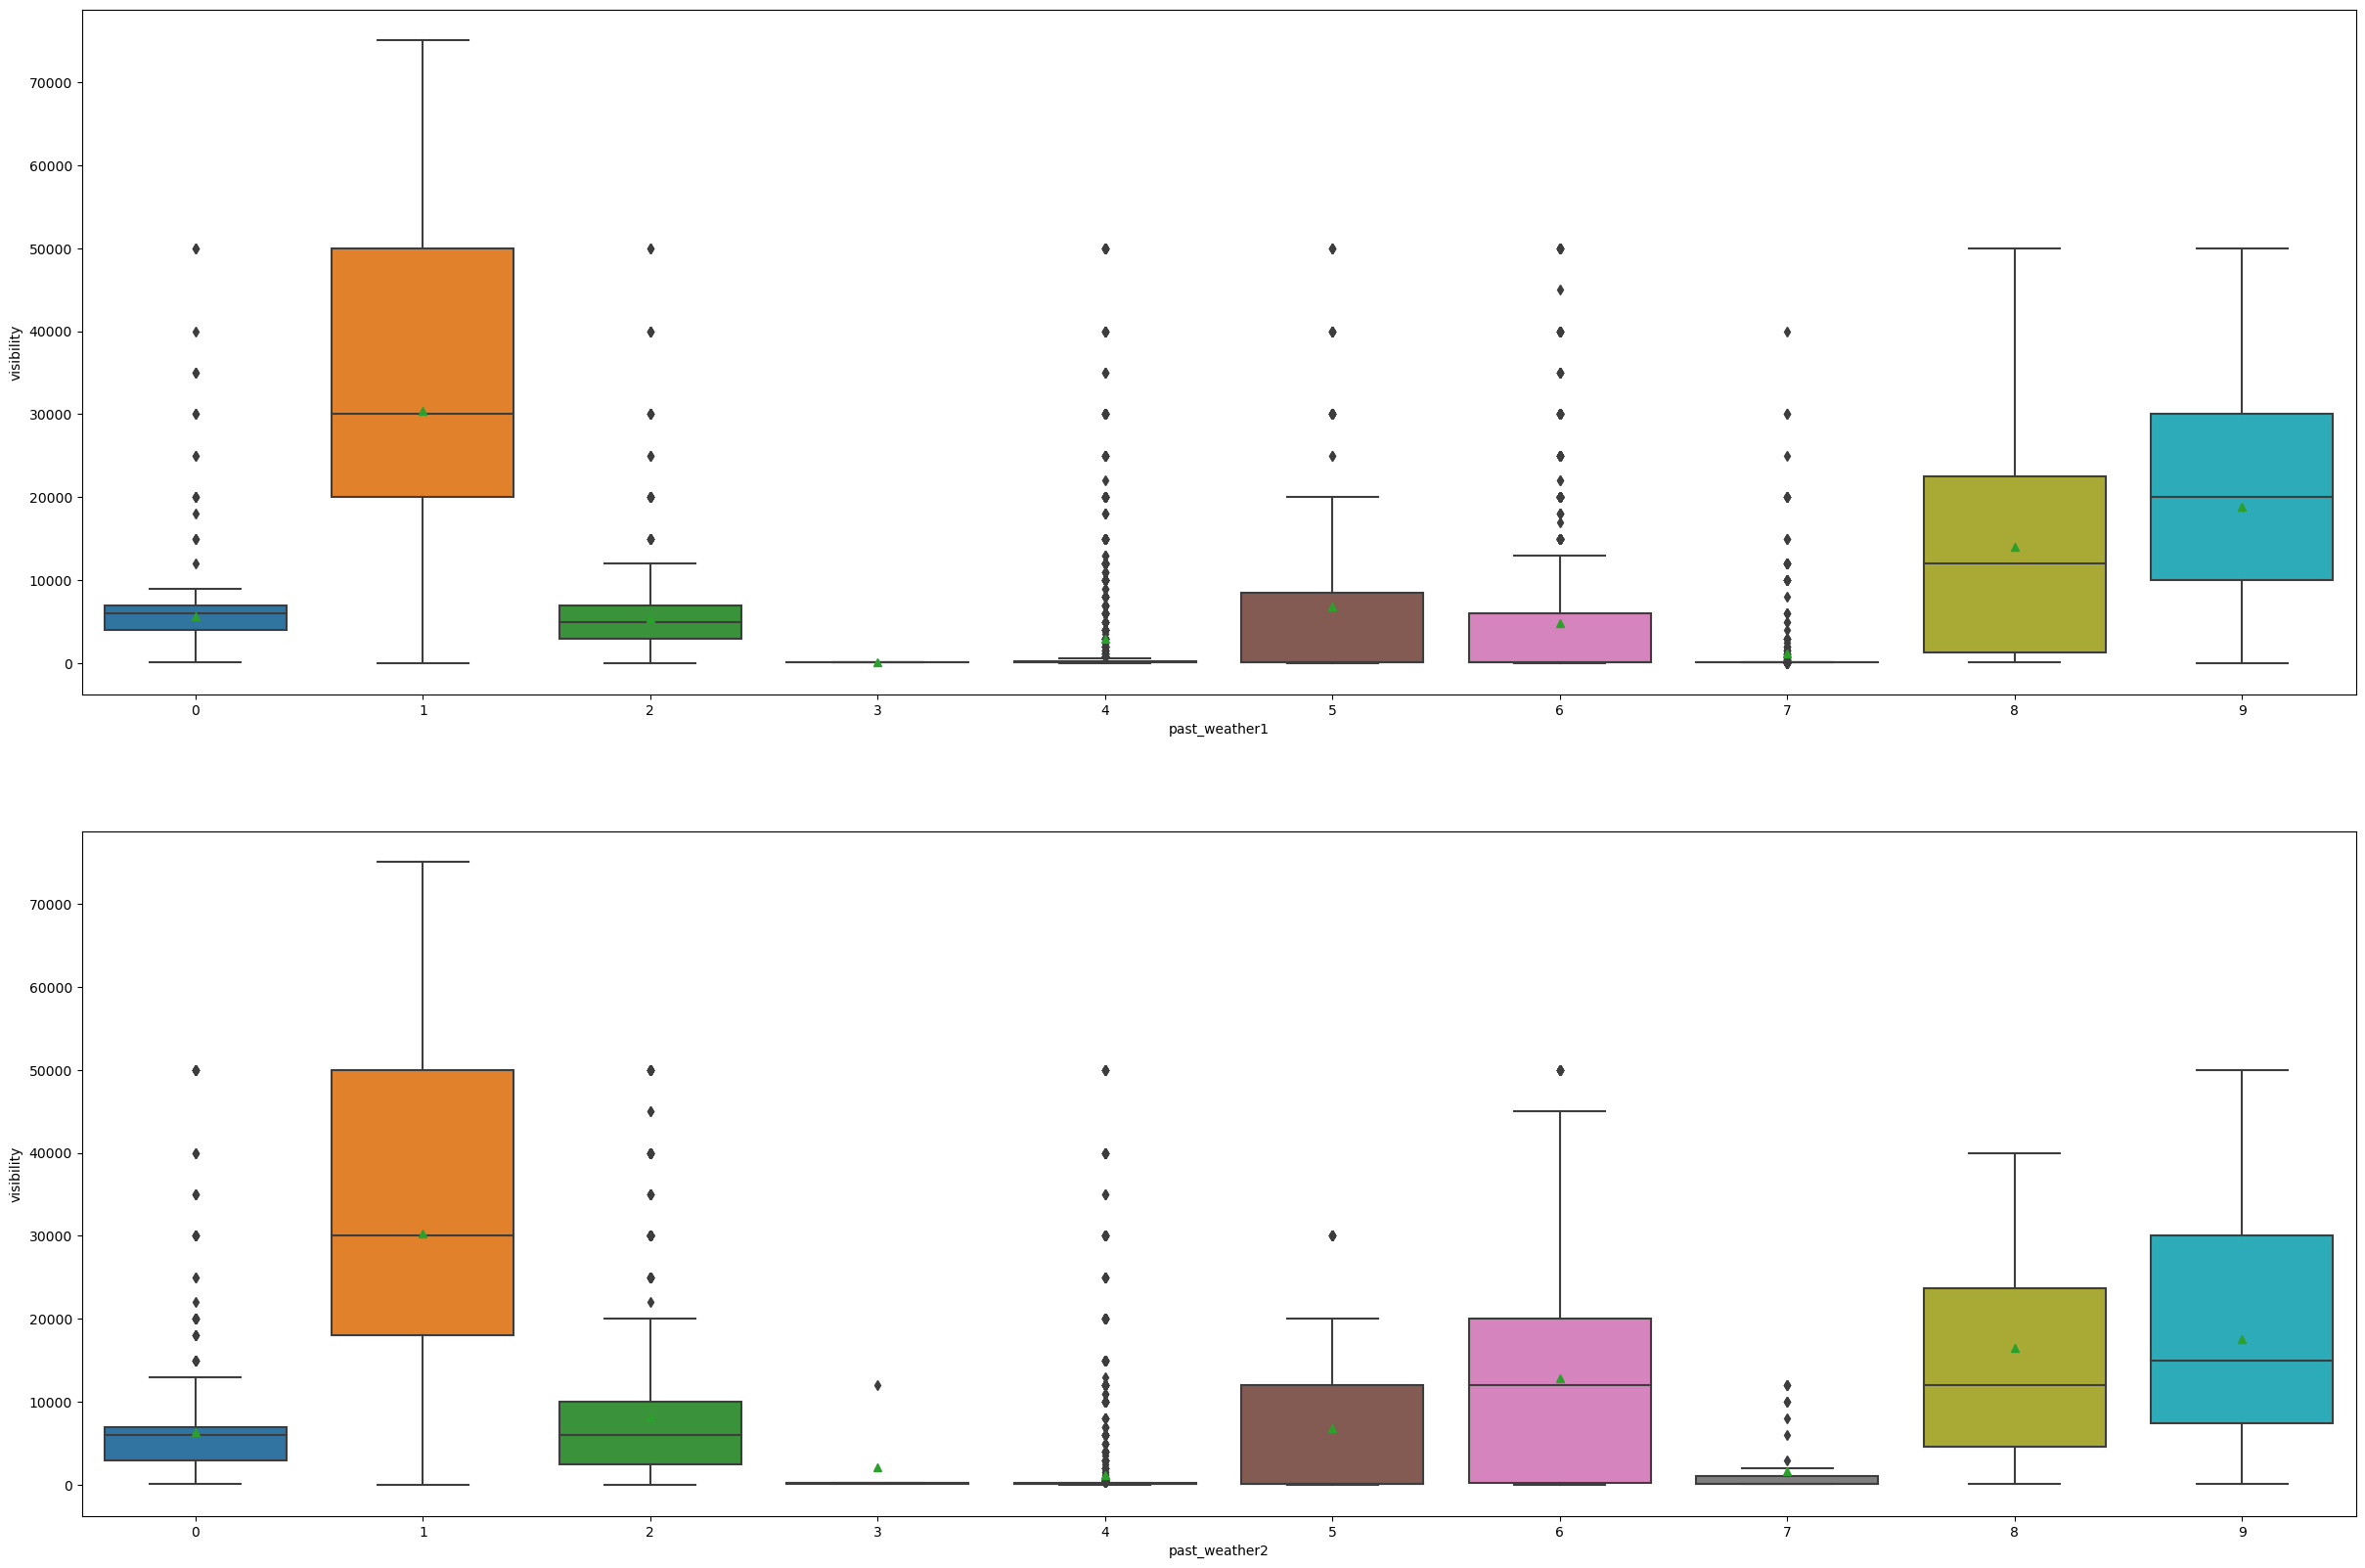

In [47]:
fig, axes = plt.subplots(2,1, figsize = (30, 20))
sns.boxplot(data = df, x  ='past_weather1', y = 'visibility', showmeans = True, ax = axes[0])
sns.boxplot(data = df, x  ='past_weather2', y = 'visibility', showmeans = True, ax = axes[1])
plt.show()

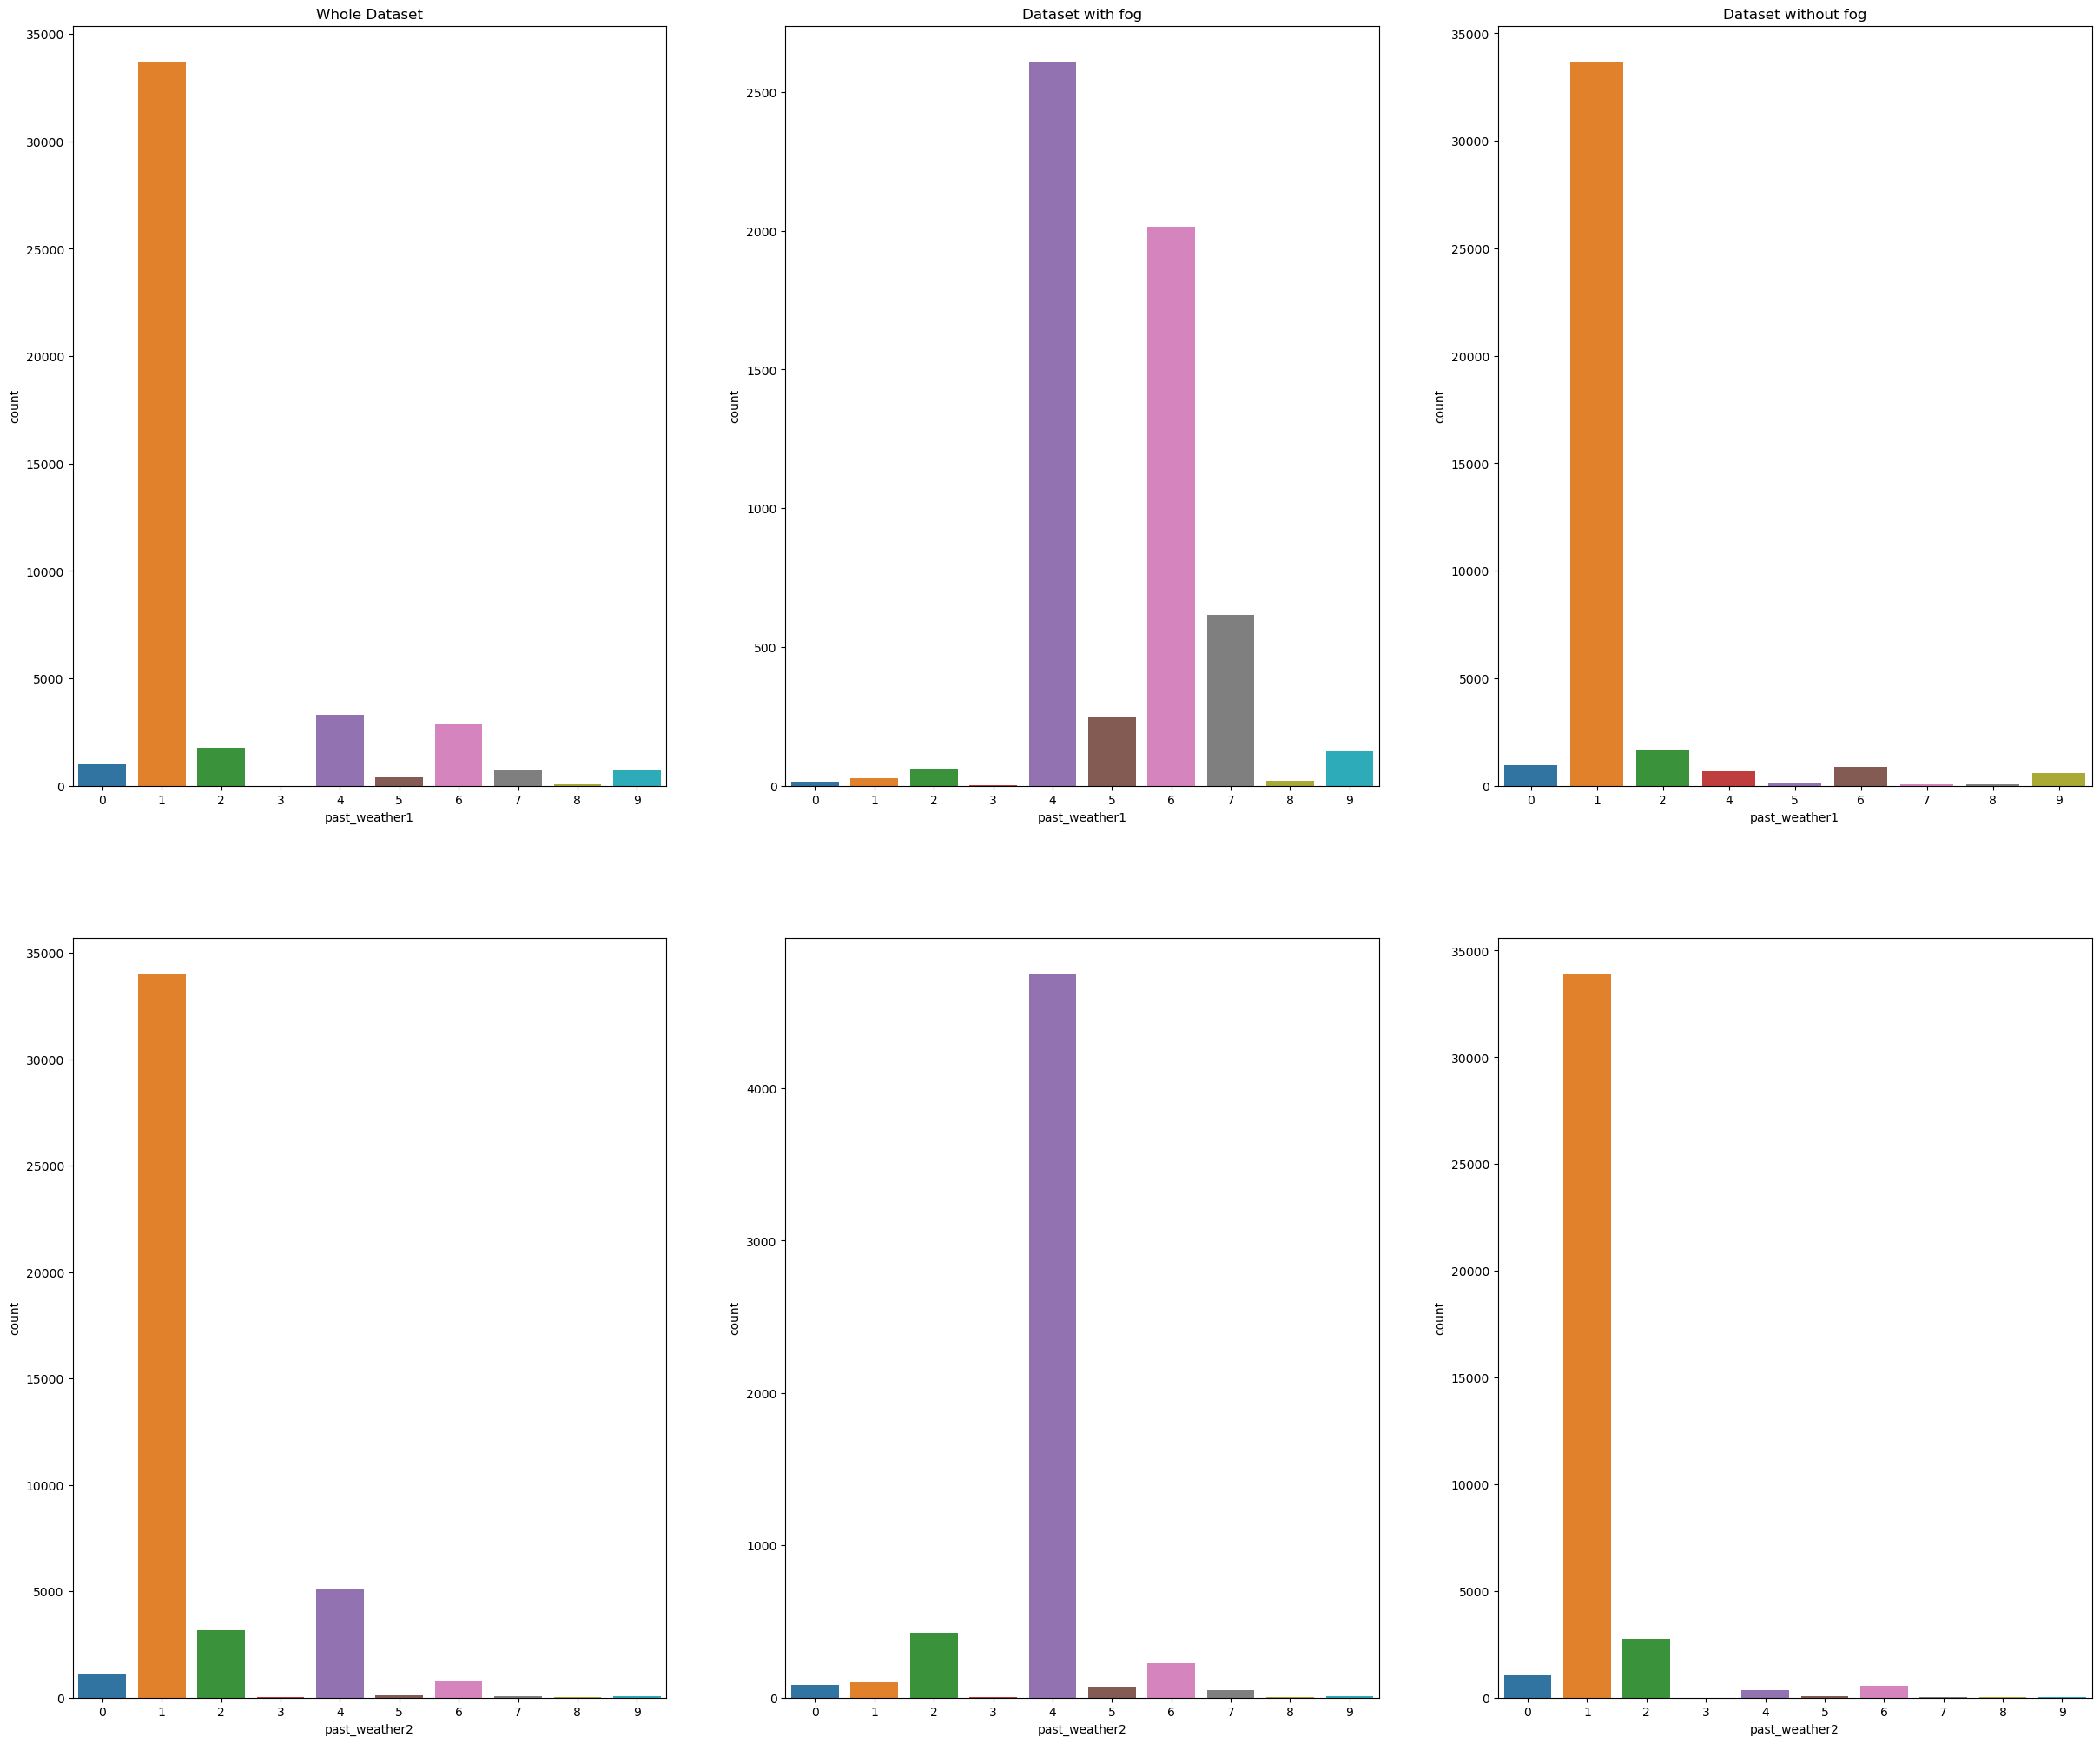

In [48]:
fig, axes = plt.subplots(2,3,figsize = (30,25))

sns.countplot(data = df, x = 'past_weather1', ax = axes[0, 0])
sns.countplot(data = df[df['fog'] == 1], x = 'past_weather1', ax = axes[0, 1])
sns.countplot(data = df[df['fog'] == 0], x = 'past_weather1', ax = axes[0, 2])

sns.countplot(data = df, x = 'past_weather2', ax = axes[1, 0])
sns.countplot(data = df[df['fog'] == 1], x = 'past_weather2', ax = axes[1, 1])
sns.countplot(data = df[df['fog'] == 0], x = 'past_weather2', ax = axes[1, 2])

axes[0,0].set_title('Whole Dataset')
axes[0,1].set_title('Dataset with fog')
axes[0,2].set_title('Dataset without fog')

plt.show()

## Wind Direction

In [49]:
var = 'wind_direction'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

0 Nan out of 44452 data


In [50]:
df['wind_direction'].unique()

array([160.,   0., 140.,  70.,  10.,  20., 180., 330., 170., 150., 110.,
       130.,  90., 100.,  60.,  40.,  30., 350., 190., 200., 230., 220.,
       240., 260., 270., 280., 250., 120., 360.,  50., 300.,  80., 340.,
       310., 290., 210., 320.,  38.])

In [51]:
def round_10(num):
    intero = num // 10
    resto = num % 10
    if resto >= 5:
        return (intero + 1) * 10
    else:
        return intero * 10
    
df['wind_direction'] = df['wind_direction'].astype(int)
df['wind_direction'] = df['wind_direction'].apply(round_10)
df['wind_direction'][df['wind_direction']==360] = 0

C:\Users\gltut\AppData\Local\Temp\ipykernel_31192\4082880089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_direction'][df['wind_direction']==360] = 0


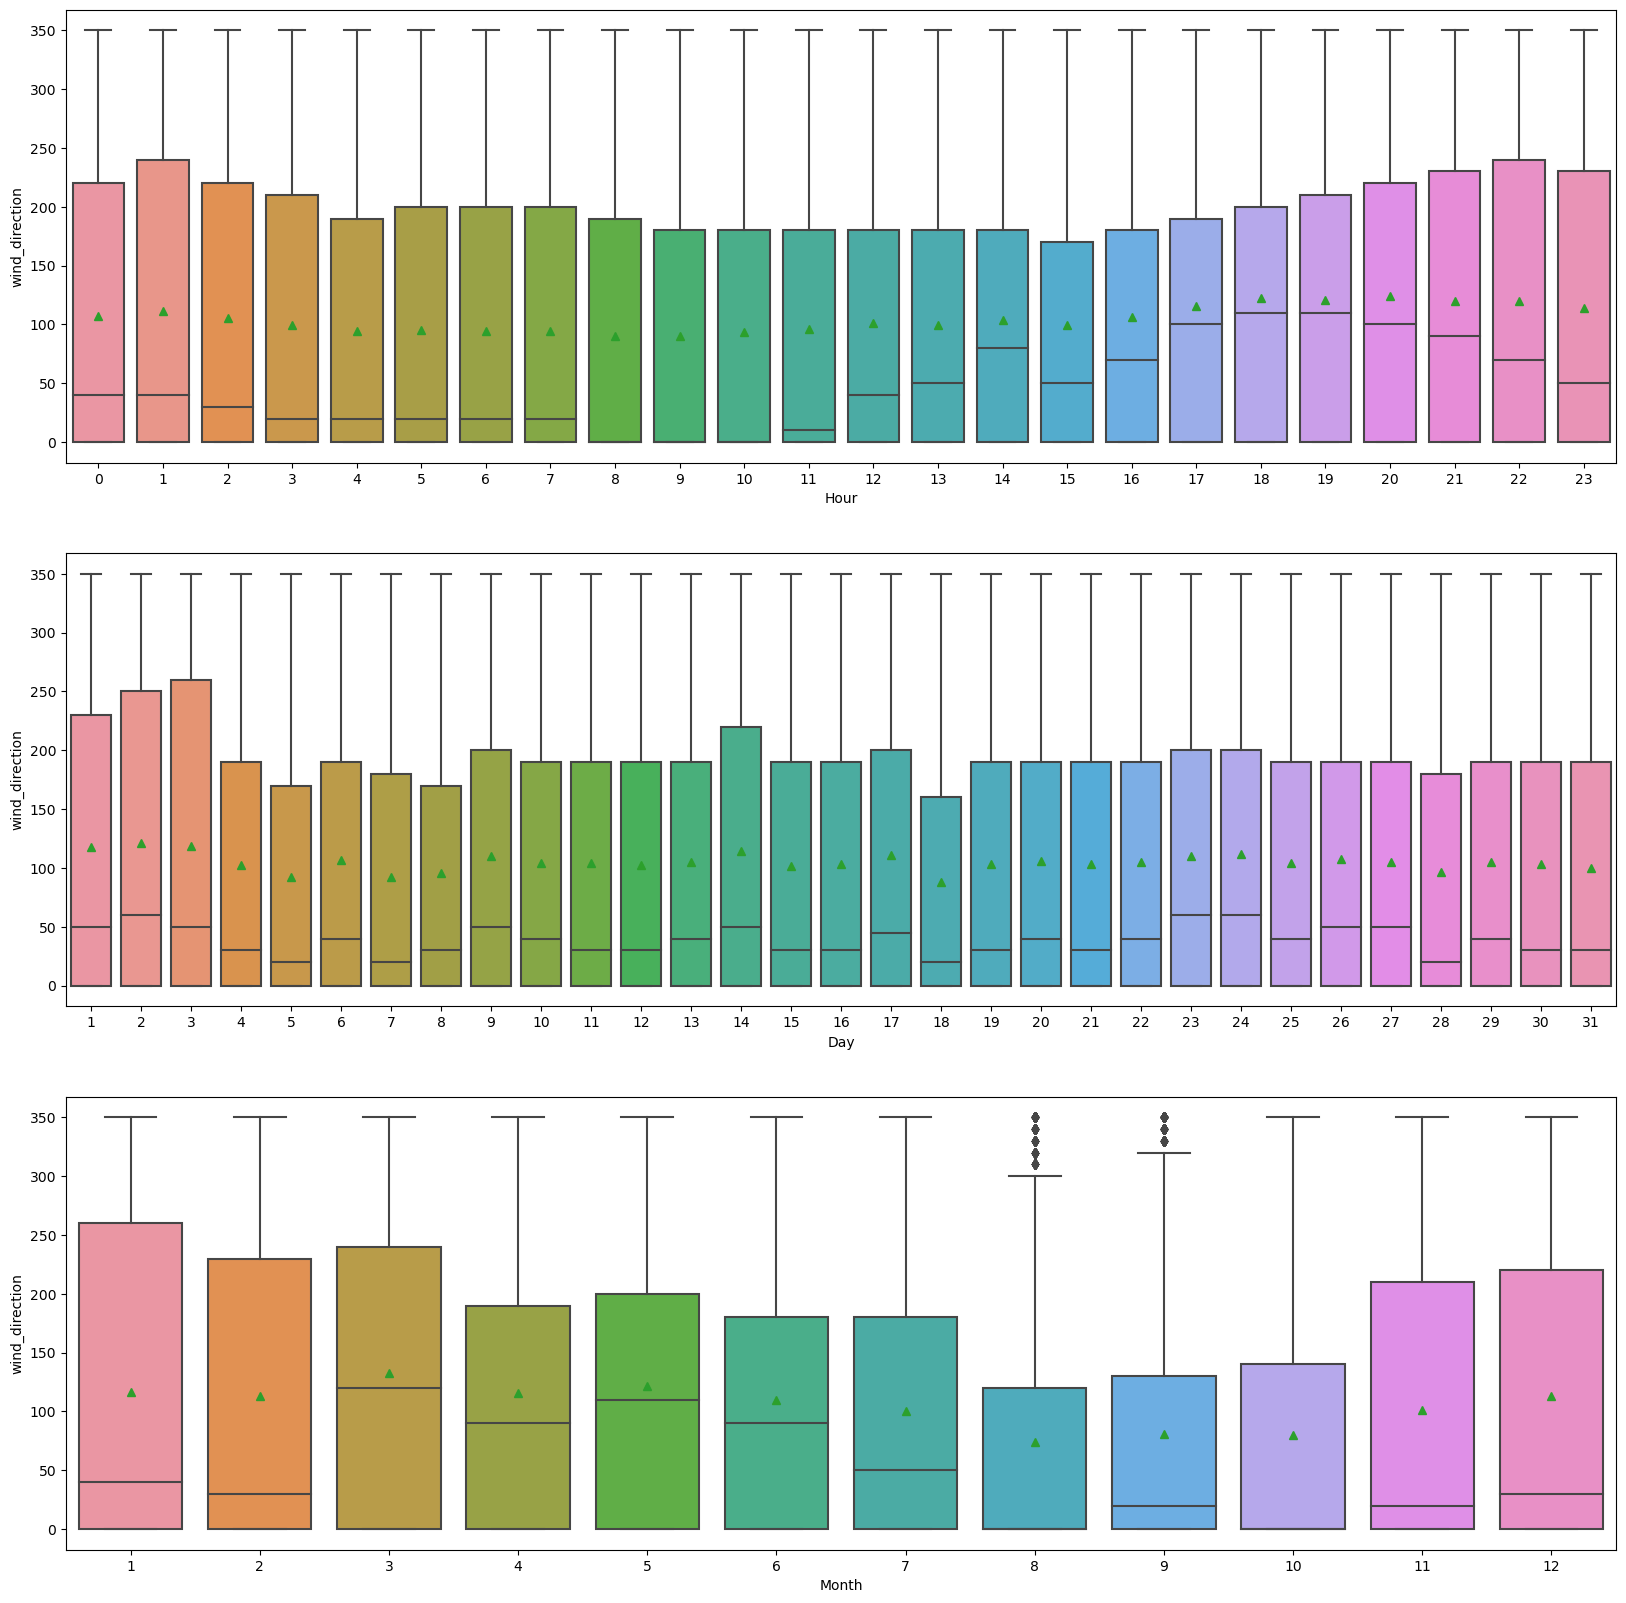

In [52]:
fig, ax = plt.subplots(3,1, figsize = (20,20))
sns.boxplot(data = df, x = 'Hour', y = var, ax = ax[0], showmeans=True)
sns.boxplot(data = df, x = 'Day', y = var, ax = ax[1], showmeans=True)
sns.boxplot(data = df, x = 'Month', y = var, ax = ax[2], showmeans=True)
plt.show()

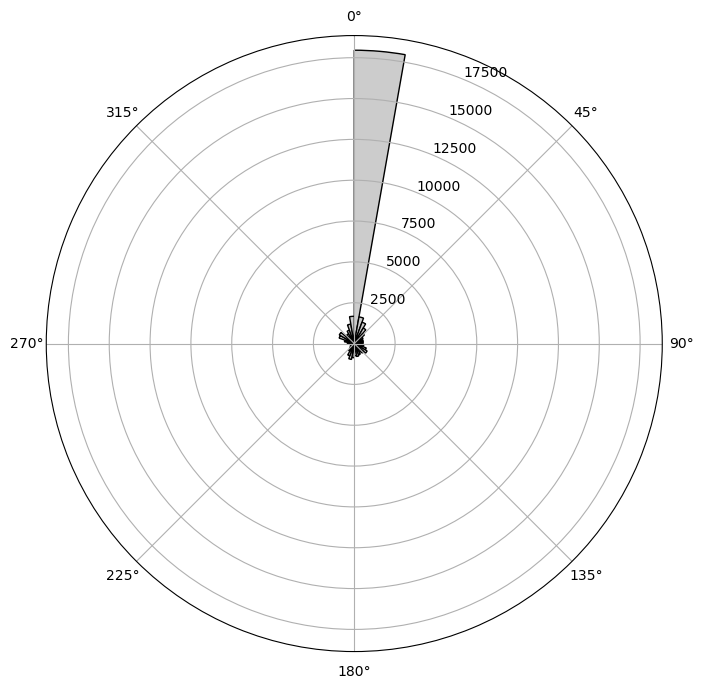

In [53]:
degrees = df['wind_direction']
radians = np.deg2rad(degrees)


bin_size = 10
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()


## Wind Speed

In [54]:
var = 'wind_speed'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

0 Nan out of 44452 data


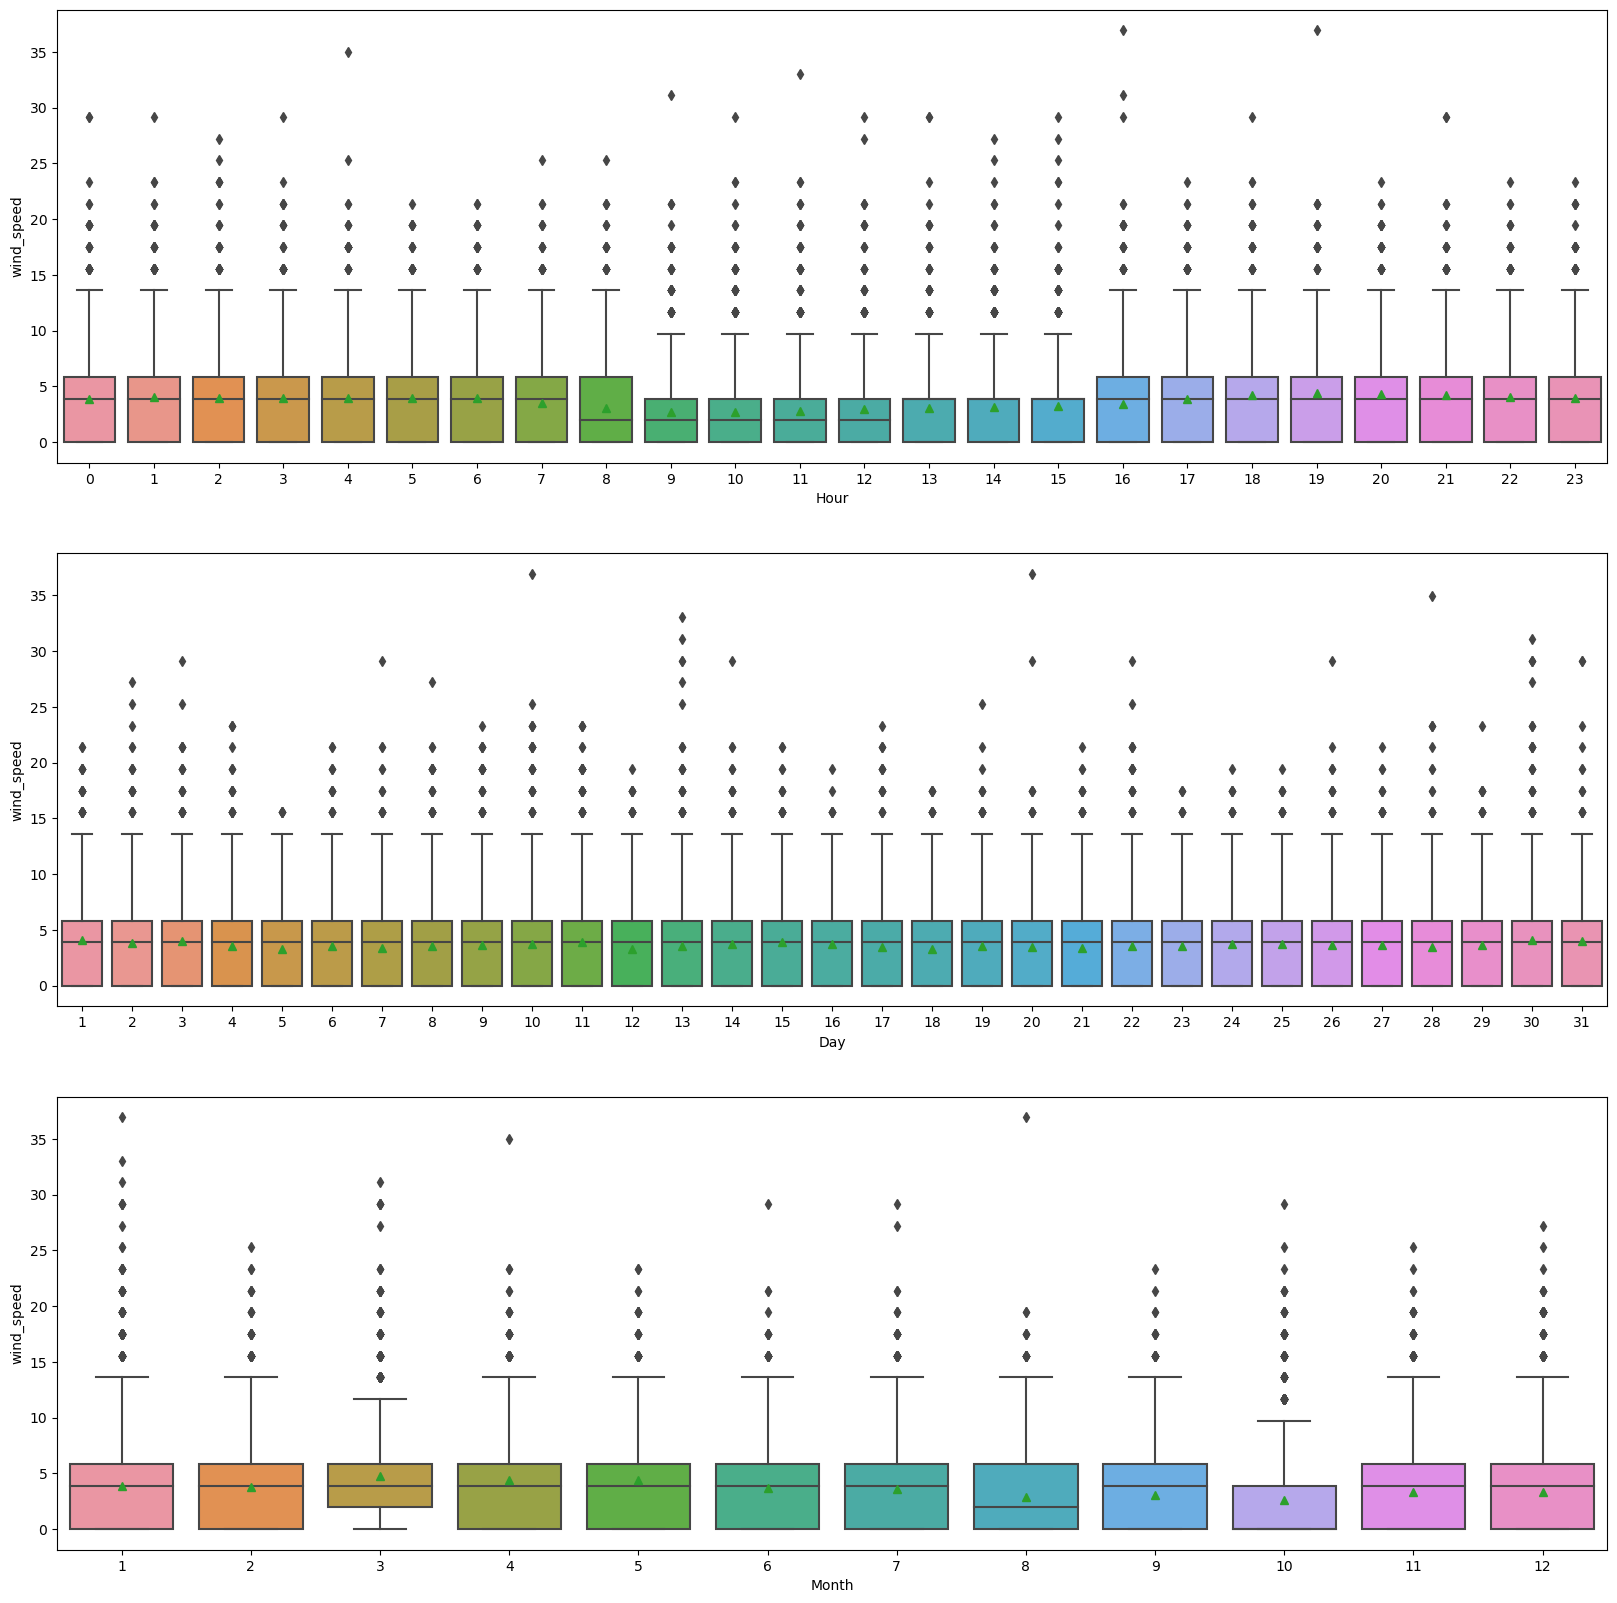

In [55]:
fig, ax = plt.subplots(3,1, figsize = (20,20))
sns.boxplot(data = df, x = 'Hour', y = var, ax = ax[0], showmeans=True)
sns.boxplot(data = df, x = 'Day', y = var, ax = ax[1], showmeans=True)
sns.boxplot(data = df, x = 'Month', y = var, ax = ax[2], showmeans=True)
plt.show()

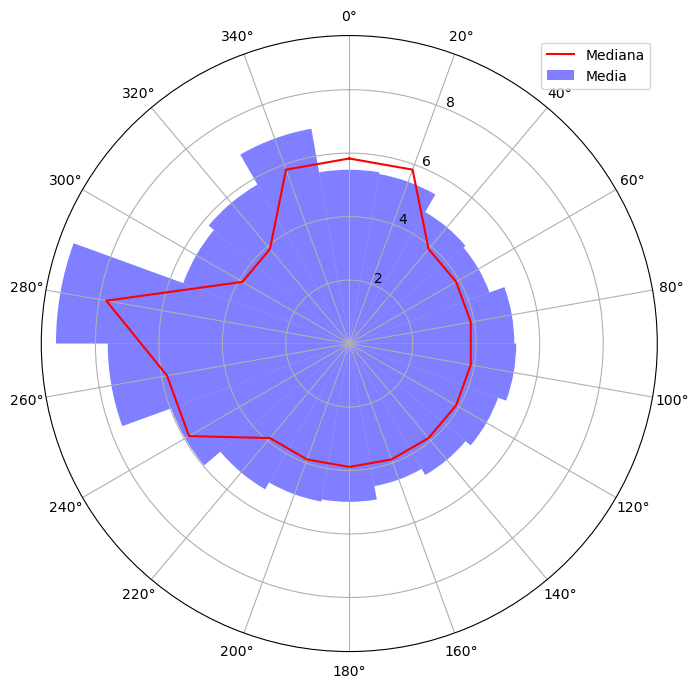

In [56]:
# Definisci i bin per le direzioni del vento
bin_size = 20  #dimensione del bin
bins = np.arange(0, 360 + bin_size, bin_size)

# Raggruppa i dati per direzione del vento
df['direction_bin'] = pd.cut(df['wind_direction'], bins=bins, labels=bins[:-1])

# Calcola la media e la mediana delle velocità del vento per ogni direzione
grouped = df.groupby('direction_bin')['wind_speed'].agg(['mean', 'median'])


# Crea un plot circolare
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')

# Angoli per le direzioni
directions = np.deg2rad(grouped.index.astype(float))

# Barre per la media
ax.bar(directions, grouped['mean'], width=np.deg2rad(bin_size), bottom=0.0, color='b', alpha=0.5, label='Media')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(directions)
ax.set_xticklabels([str(int(deg)) + '°' for deg in grouped.index])

median = list(grouped['median'])
median.append(grouped['median'][0])

directions = list(directions)
directions.append(directions[0])


# Linee per la mediana
ax.plot(directions, median, color='r', label='Mediana')
ax.legend(loc='best')

plt.show()



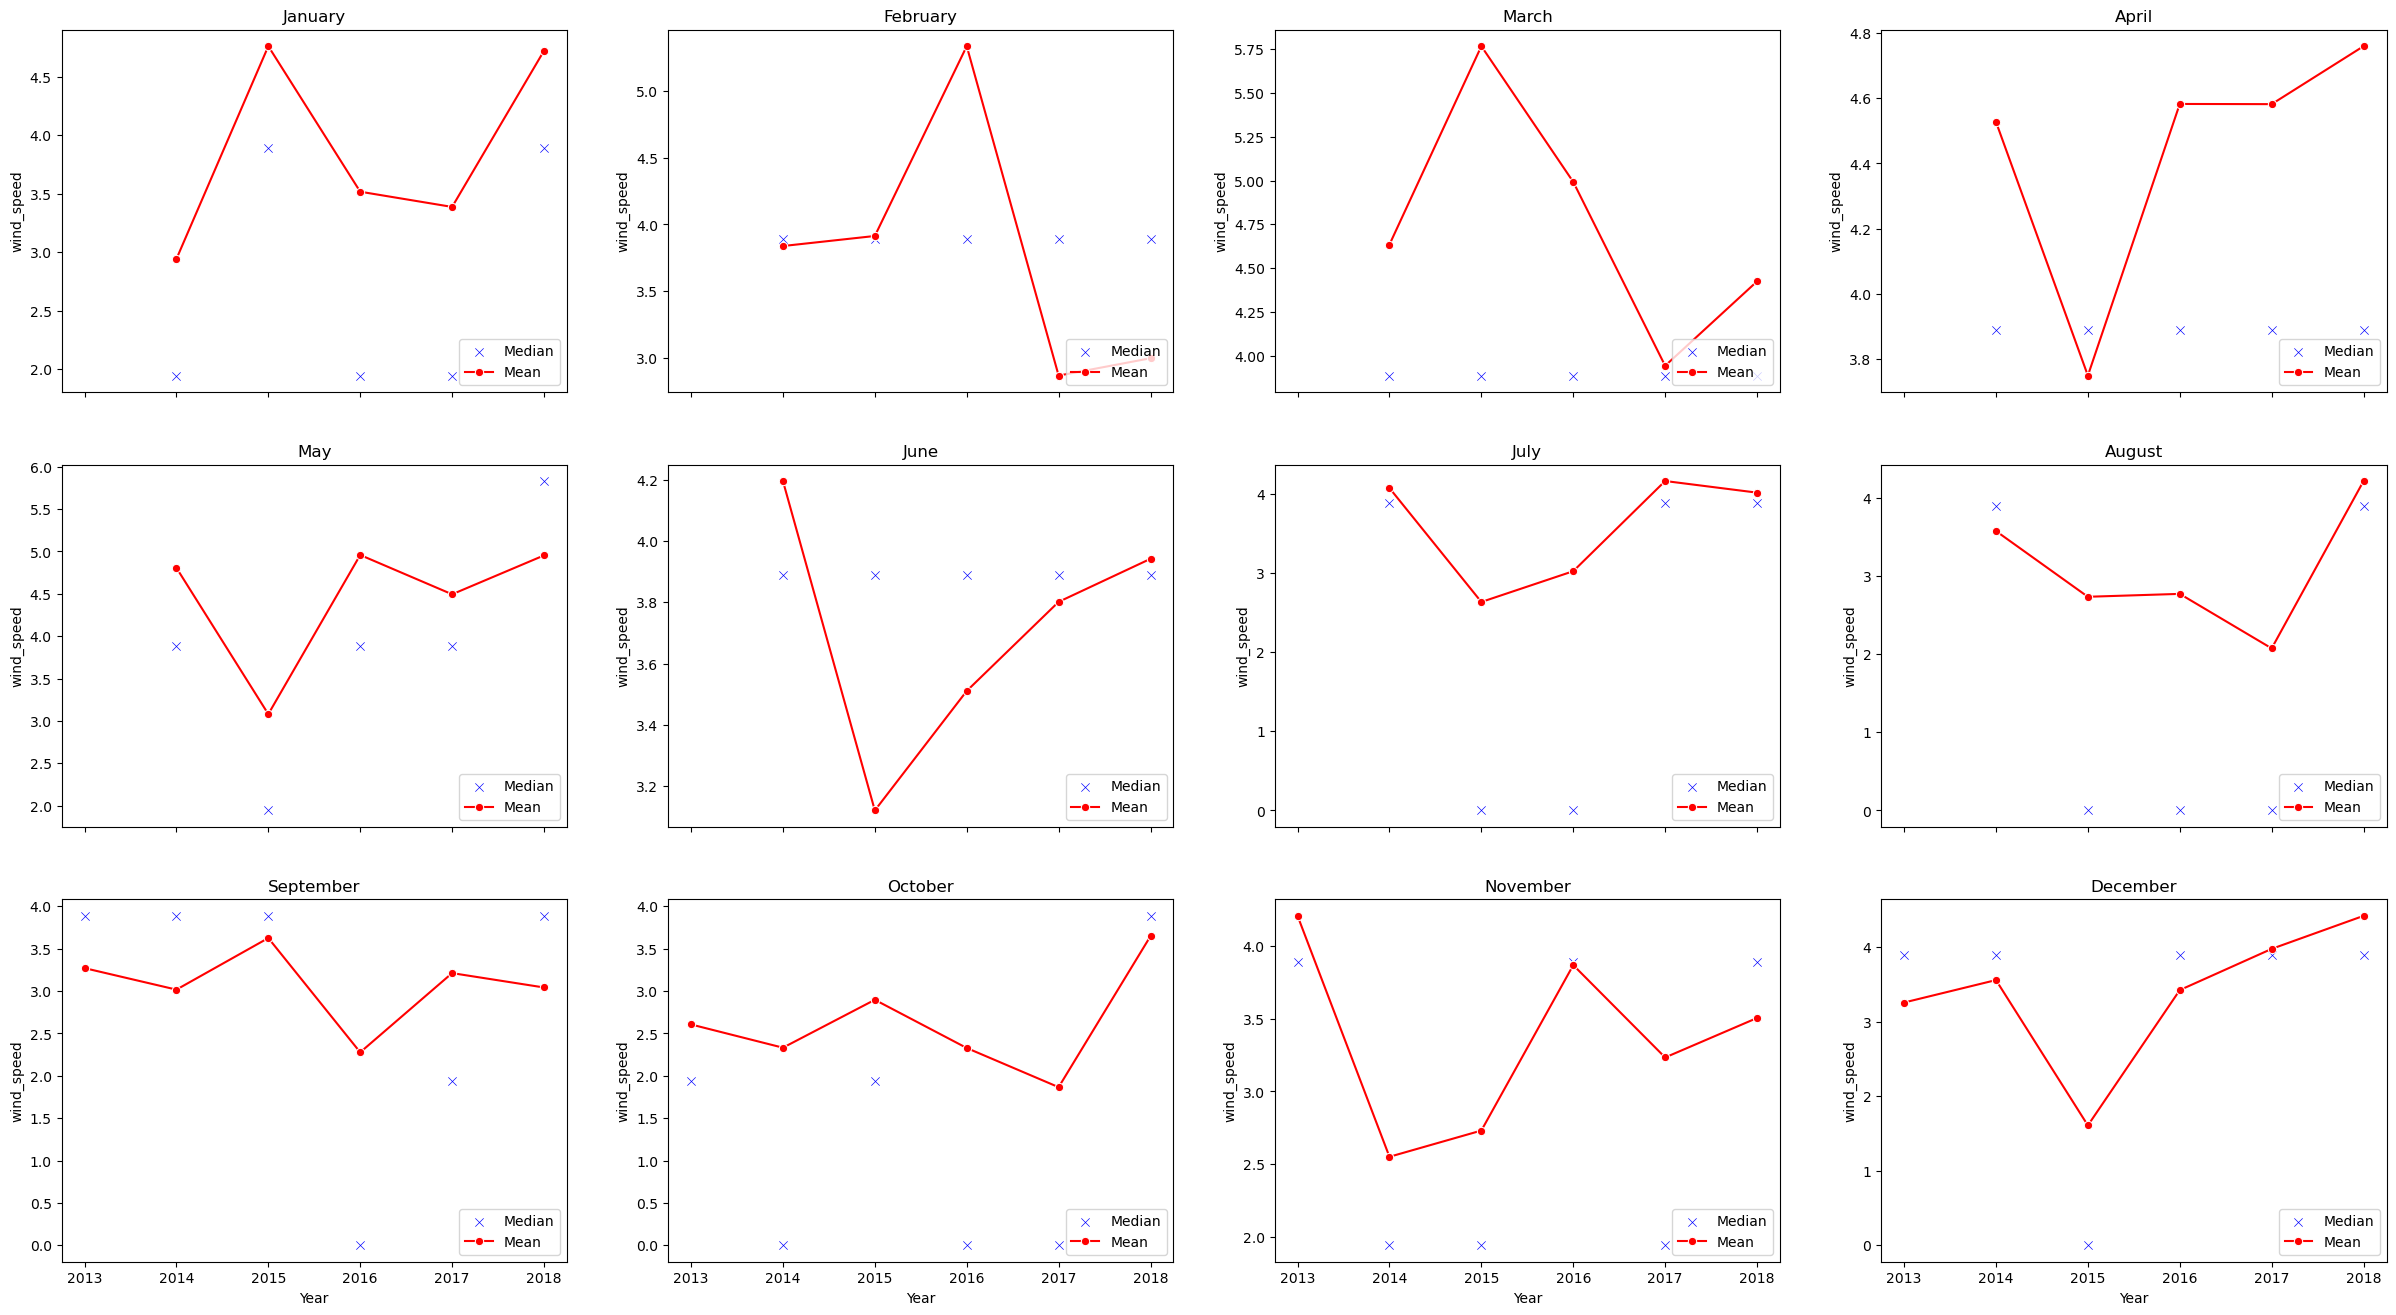

In [57]:
tst = df.groupby(['Year', 'Month'], as_index=False).agg(median=('wind_speed','median'), mean=('wind_speed','mean'))
fig,axes = plt.subplots(3, 4, figsize = (30,16), sharex=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
row, col = 0, 0

for i in range(1,13):
    
    ax = axes[row, col]
    sns.scatterplot(data = tst[tst['Month'] == i], x = 'Year', y = 'median', marker = 'x', color = 'blue', ax = ax, label = 'Median')
    sns.lineplot(data = tst[tst['Month'] == i], x = 'Year', y = 'mean', marker = 'o', color = 'red', ax = ax, label = 'Mean')

    ax.set_title(months[i-1])
    ax.set_ylabel('wind_speed')
    ax.legend(loc='lower right')

    col += 1
    if col % 4 == 0:
        col = 0
        row += 1

## Cloud Cover

In [58]:
var = 'cloud_cover'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

5705 Nan out of 44452 data


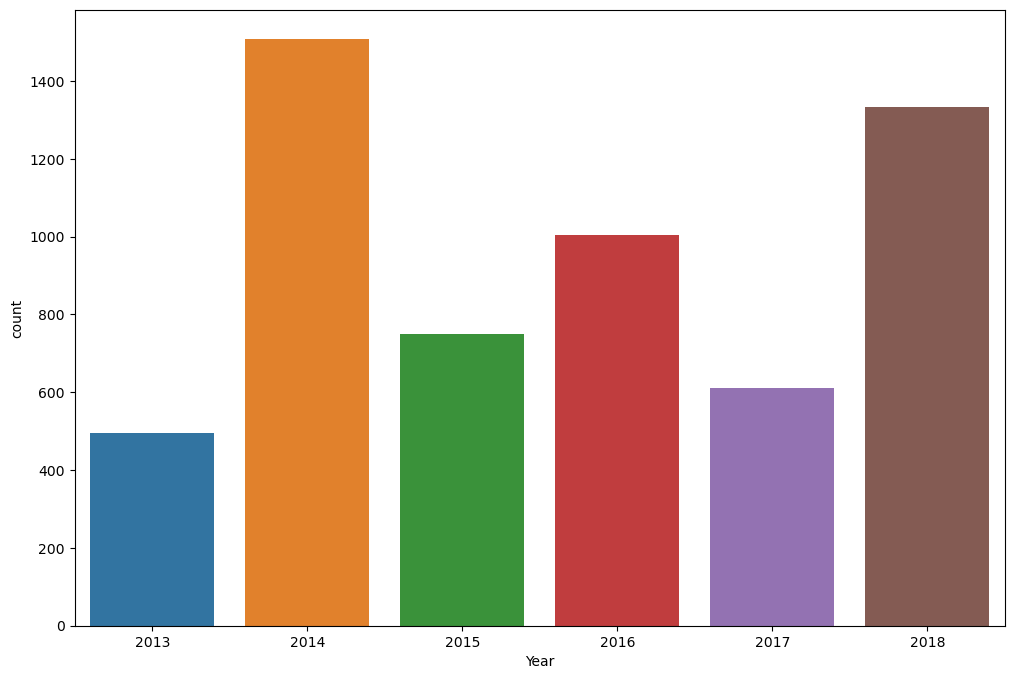

In [59]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df[['Year']][df[var].isna()], x = 'Year')
plt.show()

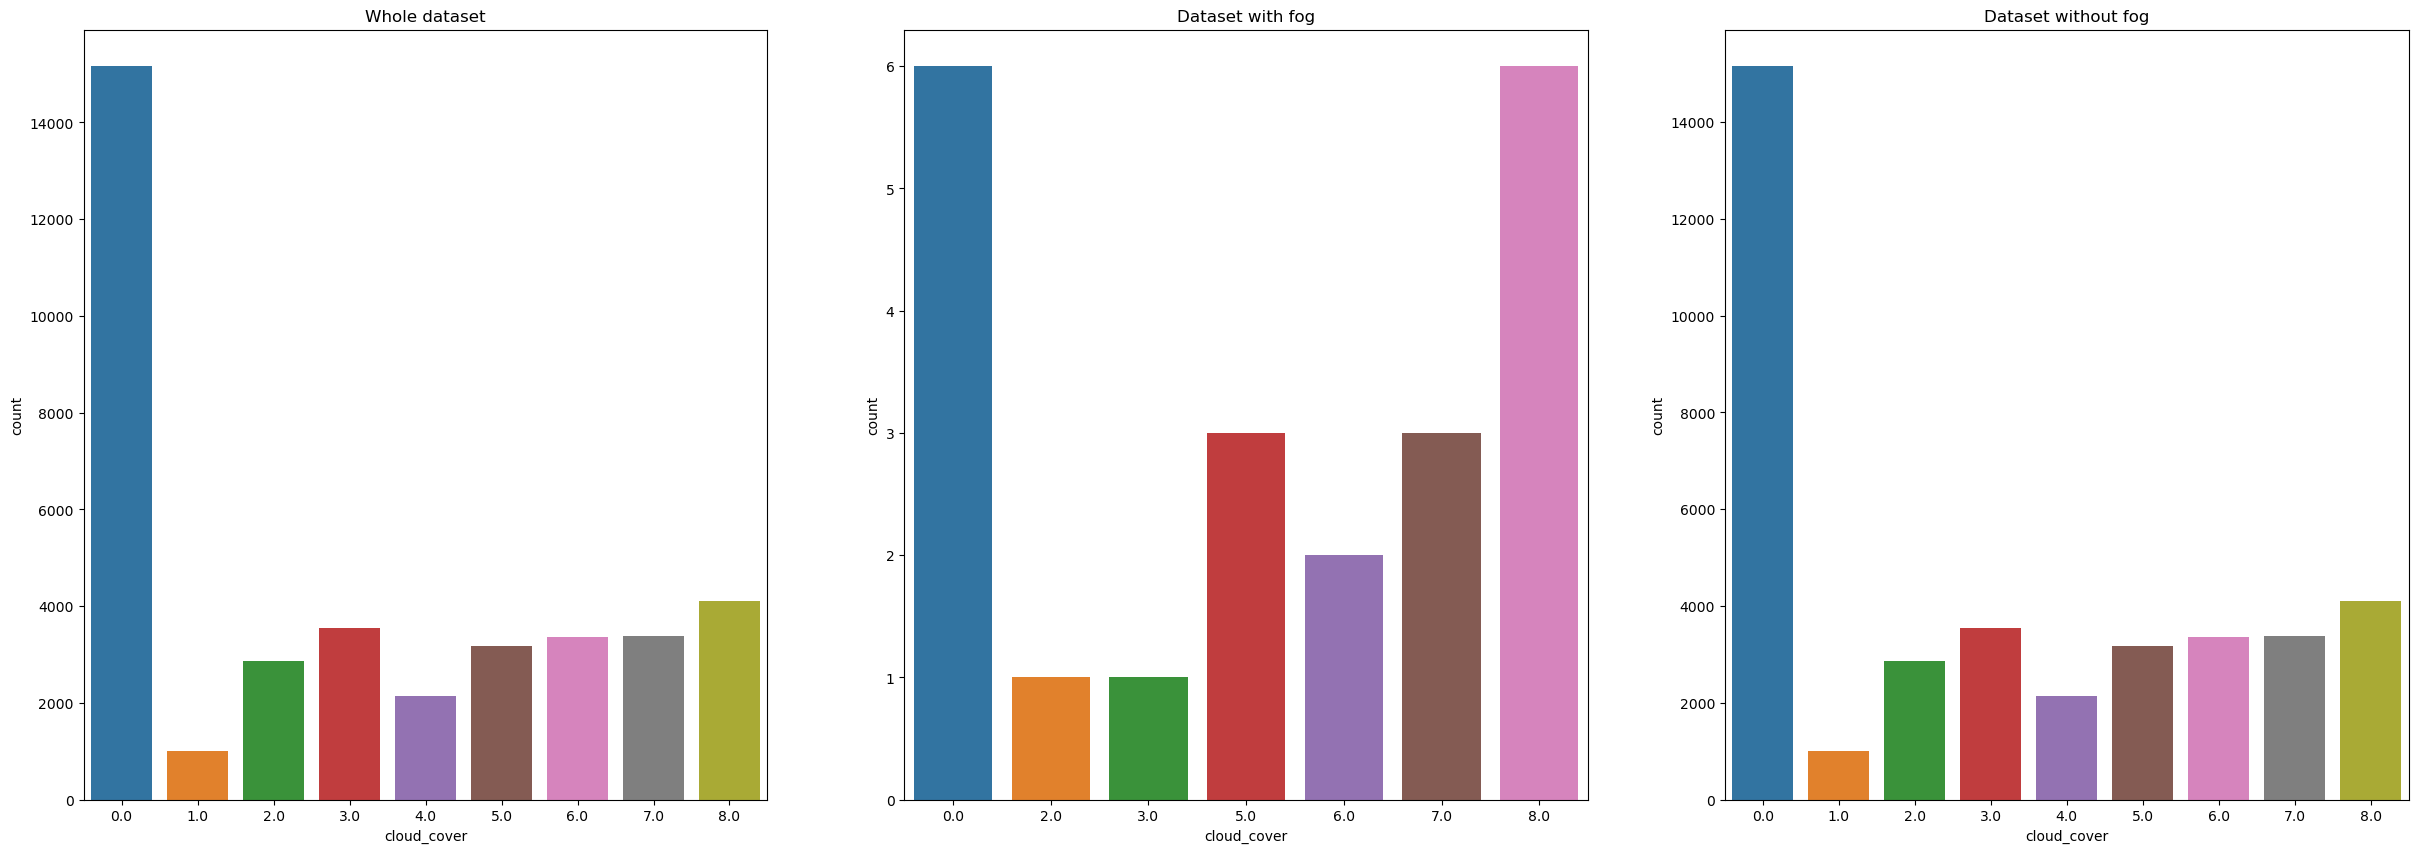

In [60]:
fig, axes = plt.subplots(1,3,figsize = (30,10))
sns.countplot(data = df, x = 'cloud_cover', ax = axes[0])
sns.countplot(data = df[df['fog'] == 1], x = 'cloud_cover', ax = axes[1])
sns.countplot(data = df[df['fog'] == 0], x = 'cloud_cover', ax = axes[2])

axes[0].set_title('Whole dataset')
axes[1].set_title('Dataset with fog')
axes[2].set_title('Dataset without fog')
plt.show()

## Cloud Type

In [61]:
var = 'cloud_type'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

0 Nan out of 44452 data


Text(0.5, 1.0, 'Dataset without fog')

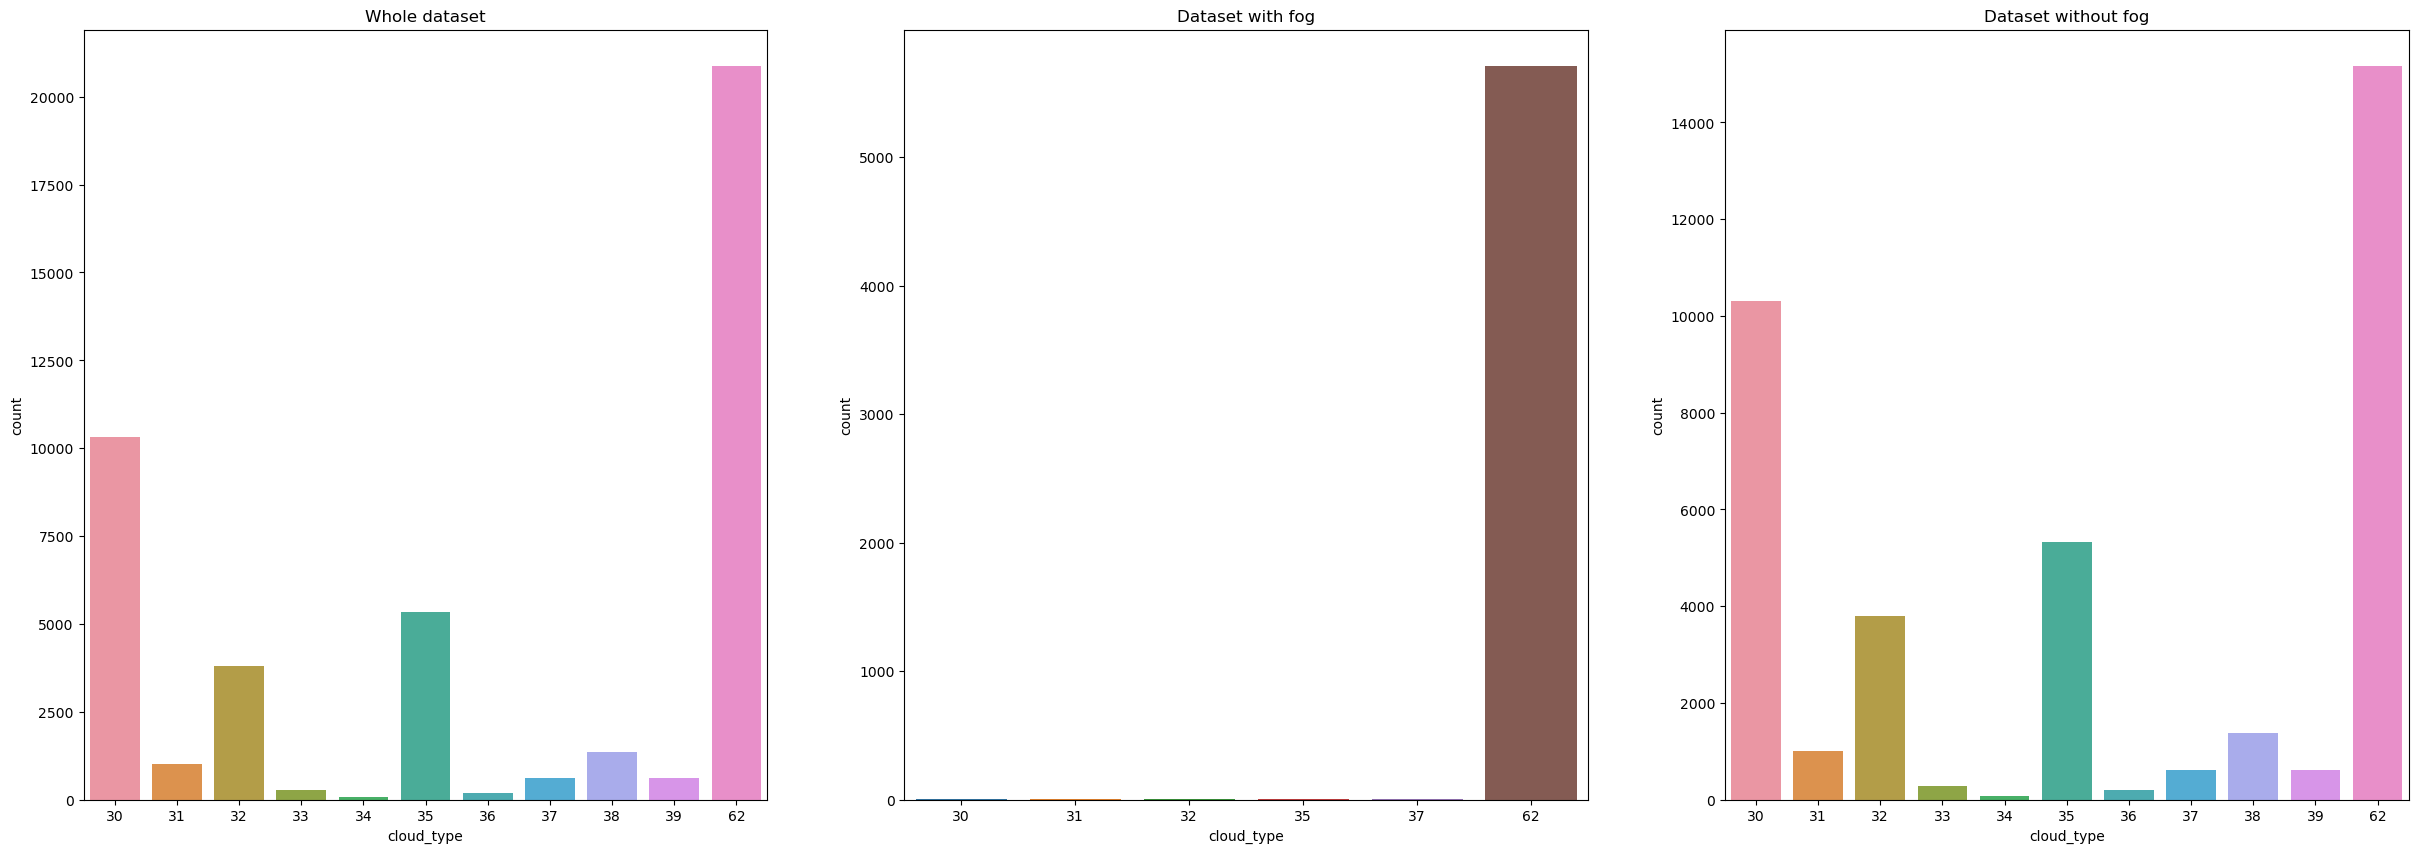

In [62]:
fig, axes = plt.subplots(1,3,figsize = (30,10))

sns.countplot(data = df, x = 'cloud_type', ax = axes[0])
sns.countplot(data = df[df['fog'] == 1], x = 'cloud_type', ax = axes[1])
sns.countplot(data = df[df['fog'] == 0], x = 'cloud_type', ax = axes[2])

axes[0].set_title('Whole dataset')
axes[1].set_title('Dataset with fog')
axes[2].set_title('Dataset without fog')

## Drybulb/Dewpoint

In [63]:
var = 'drybulb'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

2 Nan out of 44452 data


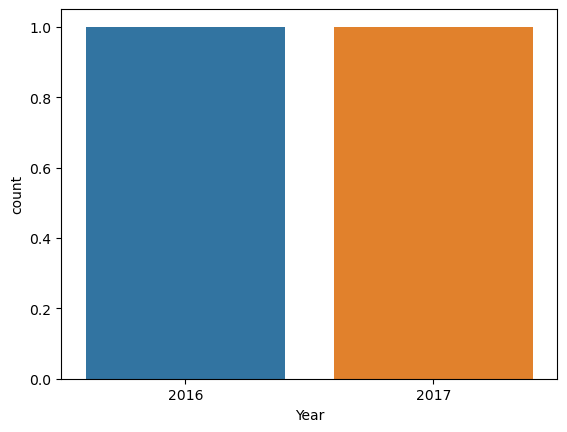

In [64]:
sns.countplot(data = df[['Year']][df[var].isna()], x = 'Year')
plt.show()

In [65]:
var = 'dewpoint'
print(f"{df[var].isna().sum()} Nan out of {df.shape[0]} data")

1 Nan out of 44452 data


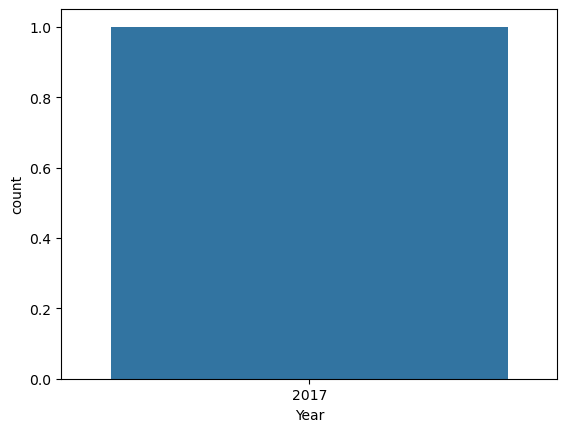

In [66]:
sns.countplot(data = df[['Year']][df[var].isna()], x = 'Year')
plt.show()

In [67]:
# when all two are NaN
df1 = df[(~df['drybulb'].isna()) & (~df['dewpoint'].isna())].copy()
df1 = df1.reset_index(drop = True)

<AxesSubplot:xlabel='fog', ylabel='value'>

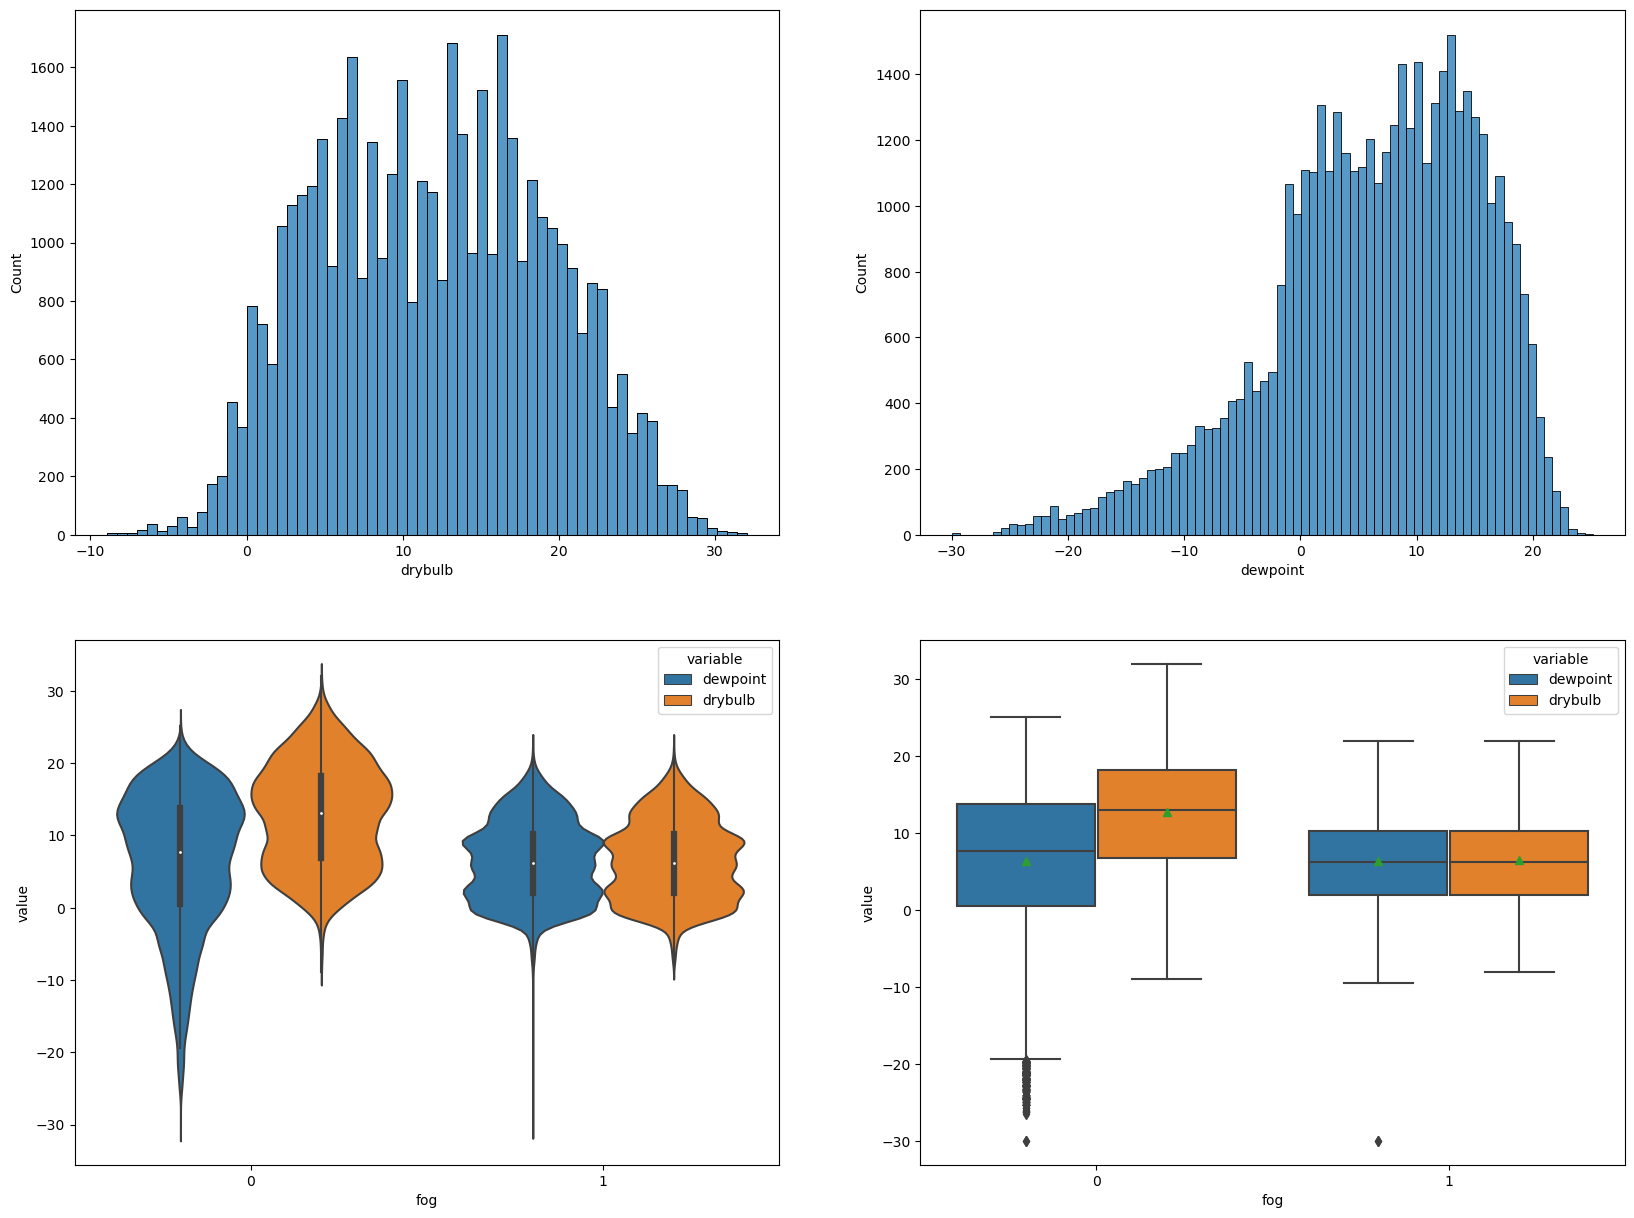

In [68]:
a = pd.melt(df1[['dewpoint', 'drybulb']])
b = list(df1['fog'])
b += b
a['fog'] = b

fig, axes = plt.subplots(2, 2, figsize = (20,15))
sns.histplot(data = df[~df['drybulb'].isna()], x = 'drybulb', ax = axes[0, 0])
sns.histplot(data = df[~df['dewpoint'].isna()], x = 'dewpoint', ax = axes[0, 1])
sns.violinplot(data = a, x = 'fog', y = 'value', hue = 'variable', showmeans = True, ax = axes[1,0])
sns.boxplot(data = a, x = 'fog', y = 'value', hue = 'variable', showmeans = True, ax = axes[1,1])

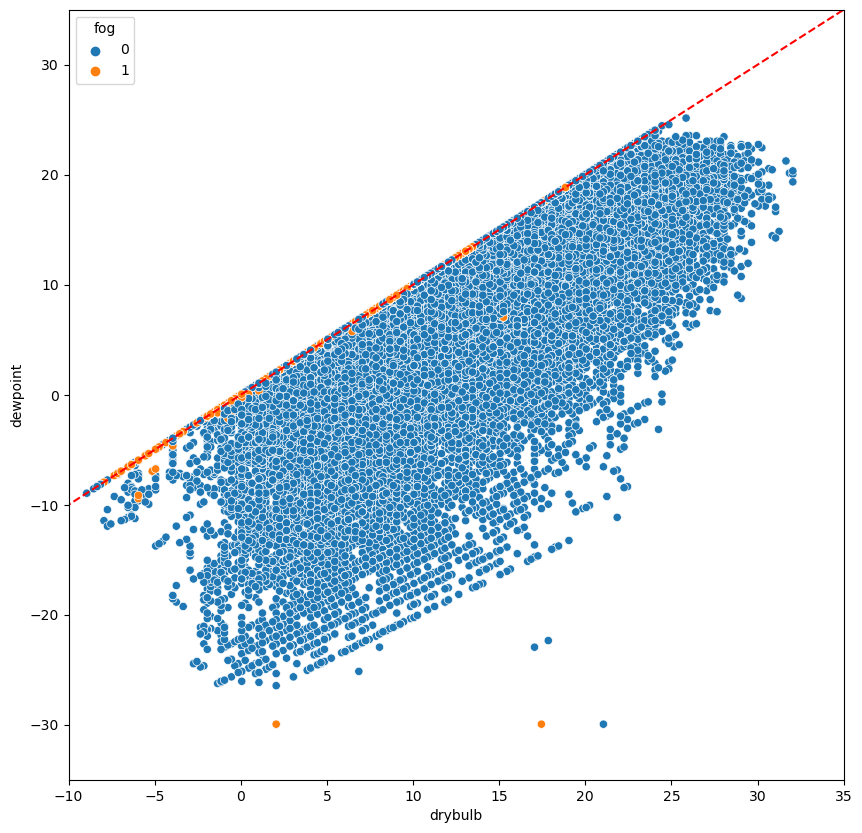

In [69]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = 'drybulb', y = 'dewpoint', hue = 'fog')
plt.plot([-50,50], [-50,50], 'r', ls = '--')
plt.xlim((-10,35))
plt.ylim((-35,35))
plt.show()

In [83]:
df = df.drop(['cloud_cover', 'direction_bin', 'Hour', 'Day', 'Month', 'Year', 'present_weather', 'date_diff', 'date', 'visibility'], axis = 1)

In [76]:
df['char_pressure_tendency']= df['char_pressure_tendency'].fillna(9)      
df = df.dropna()

In [84]:
df.isna().sum()

pressure                      0
three_hour_pressure_change    0
char_pressure_tendency        0
wind_direction                0
wind_speed                    0
past_weather1                 0
past_weather2                 0
cloud_type                    0
drybulb                       0
dewpoint                      0
Julian                        0
fog                           0
new_pres_weath                0
dtype: int64

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
sns.set()


df2 = df.copy()
df2 = df2.dropna()
df2 = df2.reset_index(drop = 1)

# Transforming the categorical variables
categorical = ['past_weather1', 'past_weather2']
df_cat = df2[categorical].copy()
# df_cat = pd.get_dummies(df_cat, columns = df_cat.columns.values)

# Scaling the numerical variables
numerical = ['Julian', 'pressure', 'wind_direction', 'wind_speed', 'drybulb', 'dewpoint', 'three_hour_pressure_change']
df_num = df2[numerical].copy()
scaler = StandardScaler()  
df_num1 = scaler.fit_transform(df_num)
df_num1 = pd.DataFrame(df_num1, columns = df_num.columns.values)

# Merging the categorical and numerical variables
x_scaled = pd.concat([df_cat, df_num1], axis = 1)
x_scaled['fog'] = df2['fog']
print(x_scaled.shape)
x_scaled.isna().sum()

(44450, 10)


past_weather1                 0
past_weather2                 0
Julian                        0
pressure                      0
wind_direction                0
wind_speed                    0
drybulb                       0
dewpoint                      0
three_hour_pressure_change    0
fog                           0
dtype: int64

In [136]:
X = x_scaled.drop('fog', axis = 1)
y = x_scaled['fog']

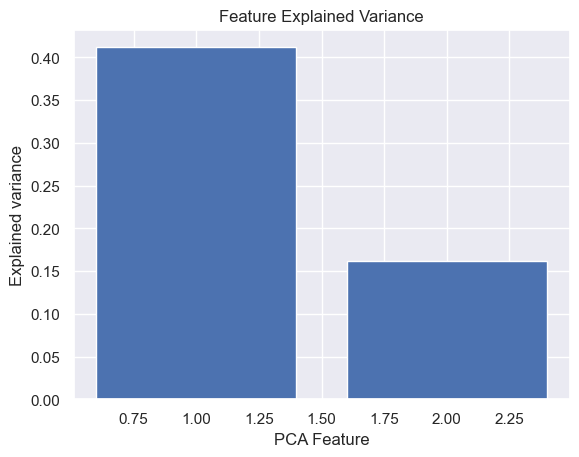

In [161]:
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(X)
 
# Plot Featured Explained Variance
 
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

pca_df['target'] = list(y)


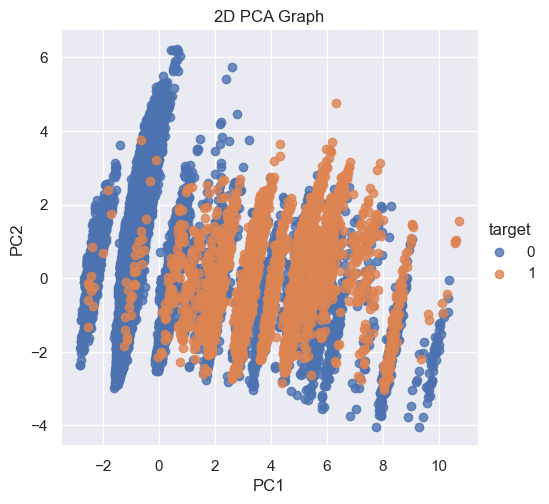

In [162]:
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

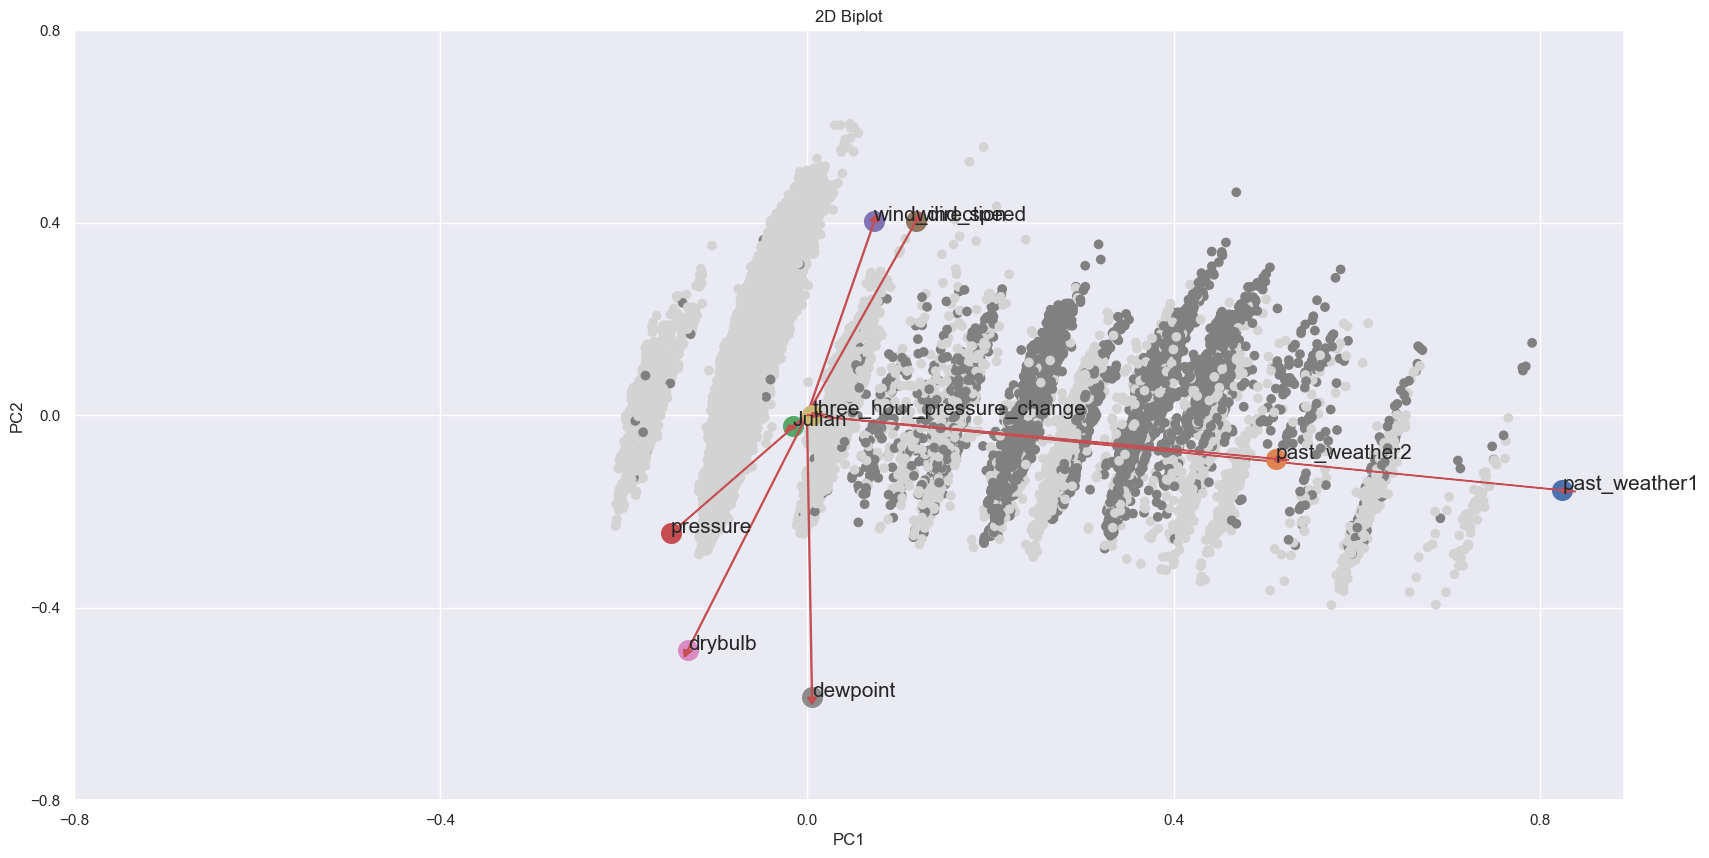

In [165]:
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = X.columns.values
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
 
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
 
# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 

pca_df['target'] = list(y)
 
# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
colors = {0:'lightgray', 1:'gray'}
# Plot the loadings on a Scatter plot
xs = loadings[0]
ys = loadings[1]
plt.figure(figsize = (20,10))
plt.scatter(
    x=pca_df_scaled['PC1'], 
    y=pca_df_scaled['PC2'],
    c = pca_df_scaled['target'].map(colors)
    )
 

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames, fontdict = {'size':15})

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()